# Chapter 2: Seasonal Decomposition

Seasonal decomposition is the process of breaking down time series graphs into their core components. With an enhanced understanding of the parts that make up the movement of the data, you are able to improve forecasting abilities. This chapter will include the decomposition and the forecasting of the automotive industry.

## Chapter 2.0 - Function Creation

In [178]:
#Import the necessary packages again
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import seaborn as sns
plt.style.use('ggplot')
from matplotlib.pyplot import figure


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [ ]:
from sklearn.linear_model import LinearRegression
def plot_least_squares_line(dataframe, x_column, y_column, x_label, y_label):
    # Extracting x and y values from the dataframe
    x = dataframe[x_column].values.reshape(-1, 1).astype(float)
    y = dataframe[y_column].astype(float)

    # Fitting the linear regression model
    model = LinearRegression()
    model.fit(x, y)

    # Predicting y values using the model
    y_pred = model.predict(x)

    # Adding predicted values as a new column in the dataframe
    dataframe['predicted_' + y_column] = y_pred

    # Plotting the original data and the least squares line
    plt.scatter(x, y, label='original data', color='blue')
    plt.plot(x, y_pred, label='least squares', color='red')

    plt.legend()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [179]:
#Create a function for finding the line of best fit in between two data points
def least_squares_line(time_series, time_period1, time_period2):
    """
    Finds the line of best fit for a given time series data within a given time period.
    
    Parameters:
        time_series (array-like): The time series data
        time_period1: the beginning date of the line of best fit
        time_period2: the end of the line of best fit
        
    Returns:
        slope (float): The slope of the line of best fit
        intercept (float): The y-intercept of the line of best fit
    """
    time_series = time_series[time_period1:time_period2]

    # Prepare the time data
    time = np.arange(len(time_series)).reshape(-1, 1)
    
    # Create a linear regression model
    model = LinearRegression()
    
    # Fit the model to the data
    model.fit(time, time_series)
    
    # Get the slope (m) and y-intercept (b)
    slope = model.coef_[0]
    intercept = model.intercept_
    
    return slope, intercept

In [180]:
def convert_to_incrementing_months(data, date_column):
    """
    Converts a time series with yyyy-mm-dd format into incrementing month values.
    
    Parameters:
        data (DataFrame): The input DataFrame containing the time series data.
        date_column (str): The name of the column containing the date in yyyy-mm-dd format.
    
    Returns:
        DataFrame: A new DataFrame with an additional column containing incrementing month values.
    """
    # Convert the date column to datetime format
    data[date_column] = pd.to_datetime(data[date_column])
    
    # Extract year and month from the date column
    data['year'] = data[date_column].dt.year
    data['month'] = data[date_column].dt.month
    
    # Convert year and month to incrementing month values
    data['incrementing_months'] = (data['year'] - data['year'].min()) * 12 + data['month']
    
    return data

In [181]:
#Create a function called 'time_series_line' which can be done for simple Time Series Graphs with a line connecting each point
#This is going to be used numerous times throughout the project, it is also going to reduce the repeated code
def line_time_series(xdata,ydata,title,xlabel,ylabel,marker='o'):
    plt.figure(figsize = (12,8))
    plt.plot(xdata,ydata)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [182]:
#Create a function called 'scatterplot' which can be done for simple Time Series Graphs with a line connecting each point
#This will have the same impact as 'time_series_line' without the connecting lines, it serves as a different visualisation tool
def scatterplot(xdata,ydata,title,xlabel,ylabel,marker='o'):
    plt.figure(figsize = (12,8))
    plt.scatter(xdata,ydata)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


In [183]:
#Create the Dickey Fuller test to use on data
#THe Augmented Dickey Fuller Test is a test that is used to test the Stationarity of the time series graph
from statsmodels.tsa.stattools import adfuller

def adf_test(data):
    """Using the ADF test to determine if a series is stationary"""
    test_results = adfuller(data)
    print('ADF Statistic: ',test_results[0])
    print('P-Value: ',test_results[1])
    print('Critical Value: ',)
    for thres,adf_stat in test_results[4].items():
       print('\t%s: %.2f' % (thres,adf_stat))

In [184]:
def roll_mean_std_dev(df_column,window,title):

    #Look at the mean and the standard deviation of this data
    rolmean = df_column.rolling(window).mean()
    rolstd = df_column.rolling(window).std()

    #Let's check the stationarity of the graph
    #Plot the rolling statistics
    orig = plt.plot(df_column,color='blue',label='Original')
    mean = plt.plot(rolmean,color='red',label='Rolling Mean')
    std = plt.plot(rolstd,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title(title)
    plt.show(block=False)

In [185]:
import matplotlib.dates as mdates

def roll_mean_std_dev_time_period(df_column, window, title, time_period1, time_period2):

    # Calculate the rolling mean and standard deviation
    rolmean = df_column.rolling(window).mean()
    rolstd = df_column.rolling(window).std()

    # Plot the rolling statistics
    orig = plt.plot(df_column.index, df_column, color='blue', label='Original')
    mean = plt.plot(df_column.index, rolmean, color='red', label='Rolling Mean')
    std = plt.plot(df_column.index, rolstd, color='black', label='Rolling Std')

    # Convert time_period1 and time_period2 to numerical values
    time_period1_num = mdates.date2num(pd.to_datetime(time_period1))
    time_period2_num = mdates.date2num(pd.to_datetime(time_period2))

    # Set x-axis limits to display only between time_period1 and time_period2
    plt.xlim(time_period1_num, time_period2_num)

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # Format x-axis dates
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) # Set major ticks to be monthly

    plt.legend(loc='best')
    plt.title(title)
    plt.xticks(rotation=45) # Rotate x-axis labels for better readability
    plt.tight_layout() # Adjust layout to prevent clipping of labels
    plt.show(block=False)

In [186]:
from statsmodels.tsa.seasonal import seasonal_decompose

def additive_seasonal_decomposition(data, period):
    """
    Perform additive seasonal decomposition and plot the original data, trend, seasonal, and residual components.

    Parameters:
    data (pandas.Series): The time series data.
    period (int): The period of seasonality.

    Returns:
    None
    """
    decomposition = seasonal_decompose(data, model='additive', period=period)

    # Decomposed components
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    return decomposition, trend, seasonal, residual


In [187]:
from statsmodels.tsa.seasonal import seasonal_decompose

def plot_additive_seasonal_decomposition(data, period):
    """
    Perform additive seasonal decomposition and plot the original data, trend, seasonal, and residual components.

    Parameters:
    data (pandas.Series): The time series data.
    period (int): The period of seasonality.

    Returns:
    None
    """
    decomposition = seasonal_decompose(data, model='additive', period=period)

    # Decomposed components
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Create subplots
    plt.figure(figsize=(10, 8))

    # Plot the original data
    plt.subplot(411)
    plt.plot(data, label='Original')
    plt.legend()

    # Plot the trend
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend()

    # Plot the seasonal
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonal')
    plt.legend()

    # Plot the residual
    plt.subplot(414)
    plt.plot(residual, label='Residual')
    plt.legend()

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

    return decomposition, trend, seasonal, residual


## Total Cars Sold Seasonal Decomposition
The following component of Chapter 2 is going to look at forecasting total cars sold using seasonality and existing data. Using time series decomposition, each component of the time series can be found, this includes:

- Linearaity
- Seasonality
- Cyclical nature
- Irregularity
- White noise

The individual components of the dataset need to be separated into their parts. To create an accurate forecast, it is fundamental to disect the nature of the data. With projection as one of the main goals of the project, this section is very important.

In [188]:
#Load in the datasets that have been joined in SQL so that all variables have been included
#This file is found in R_files in chapter 1 yearly cars sold as cars_sold_economic_socioeconomic_data.csv
monthly_data = pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Personal_Projects/Maryland Car Sales Data/maryland_economics_database/combined_tables/monthly_car_sales_all_data.csv')
#This is going to set the index to month so that you can sense of the data easier
monthly_data.set_index(monthly_data['month'],inplace=True)
#The column month remains in the dataframe so it needs to be deleted
monthly_data.drop(columns='month',inplace=True)
#The month also needs to viewed as datetime so that it can graphed as a time series
monthly_data.index = pd.to_datetime(monthly_data.index)
monthly_data

,new_cars_sold,used_cars_sold,values_new_cars_sold,value_used_cars_sold,total_cars_sold,total_value_cars_sold,inflation_rate_cpi,unemployment_rate_not_sa,unemployment_rate_sa
month,,,,,,,,,
2002-01-01,31106,49927,755015820,386481929,81033,1141497749,2.6,5.5,5.0
2002-02-01,27520,50982,664454223,361353242,78502,1025807465,2.6,5.2,5.0
2002-03-01,34225,58794,805666244,419385387,93019,1225051631,2.4,5.1,5.0
2002-04-01,36452,59817,846368297,433061150,96269,1279429447,2.5,4.9,4.9
2002-05-01,37359,60577,855005784,442569410,97936,1297575194,2.5,4.7,4.9
...,...,...,...,...,...,...,...,...,...
2023-07-01,26360,49502,1196918451,887723892,75862,2084642343,4.7,1.7,1.8
2023-08-01,25876,52725,1222581892,908454060,78601,2131035952,4.3,1.8,1.7
2023-09-01,23892,45386,1134437699,744676584,69278,1879114283,4.1,1.8,1.6


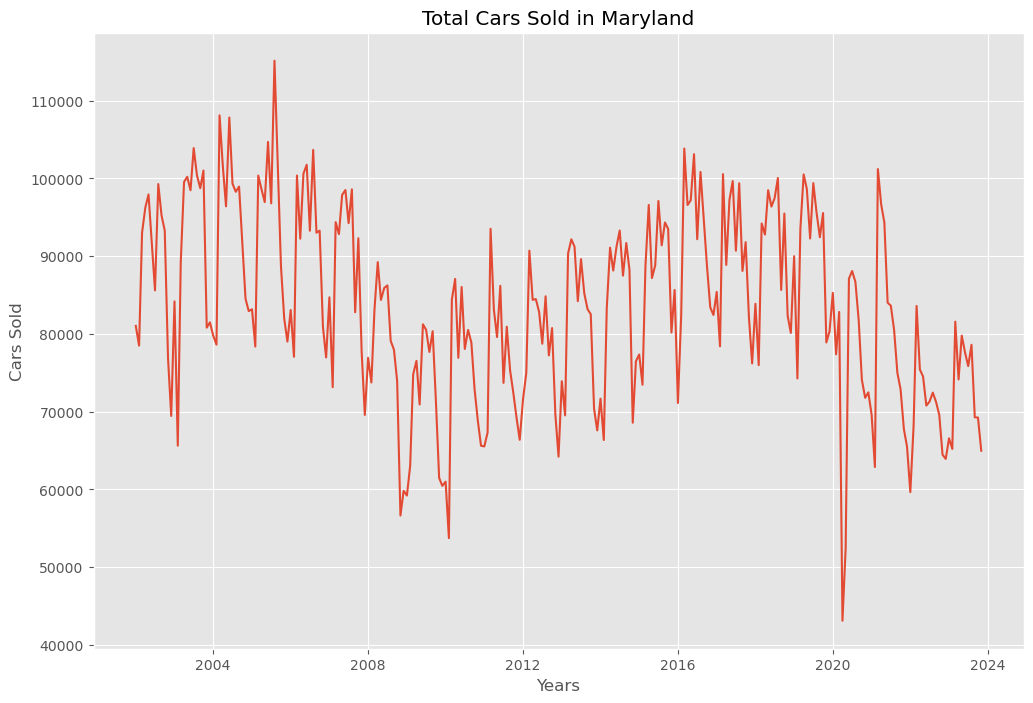

In [189]:
#Plot the monthly data
line_time_series(monthly_data.index,monthly_data['total_cars_sold'],'Total Cars Sold in Maryland','Years','Cars Sold')

The focus of this chapter is seasonal decomposition. Although in chapter 1 looking at the graph was best done when it was yearly smoothed, it is now the focus to look at the trends that take place within individual years.

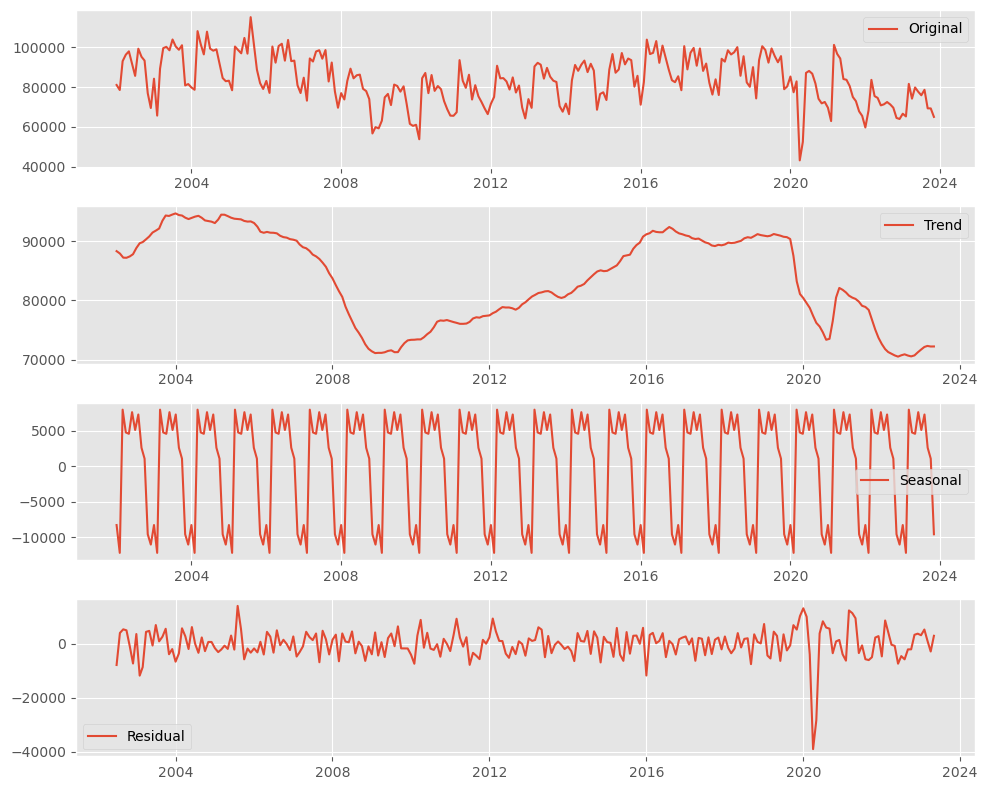

In [190]:
#Plot the seasonal decomposition with lag using the function above
plot_additive_seasonal_decomposition(monthly_data['total_cars_sold'],12)[0]

In [191]:
#Save the different graphs as different names
decomposition_monthly_cars_sold = additive_seasonal_decomposition(monthly_data['total_cars_sold'],12)[0]
trend_monthly_cars_sold = additive_seasonal_decomposition(monthly_data['total_cars_sold'],12)[1]
seasonality_monthly_cars_sold = additive_seasonal_decomposition(monthly_data['total_cars_sold'],12)[2]
residual_monthly_cars_sold = additive_seasonal_decomposition(monthly_data['total_cars_sold'],12)[3]

### Seasonal Decomposition
1. Original data - Test for stationarity and rolling means
2. Trend - This shows the cyclical shifts that take place, not the trend. It represents that there are these periods of prolonged highs followed by sharp decreases. However, these decreases are the result of economic events such as Covid-19. They should be reduced when looking to begin forecasting the data.
3. Seasonal - There is a seasonal pattern that has been suggested and it shows a few months of high with sharp decreases. This is going to be explored below
4. Residual - The residual shows that it does not stray too far away from the mean of 0 which is a good sign. However the oscillation that takes place in 2020 is enough of a reason to remove it and make a model without its influence.

### 1. Original Data

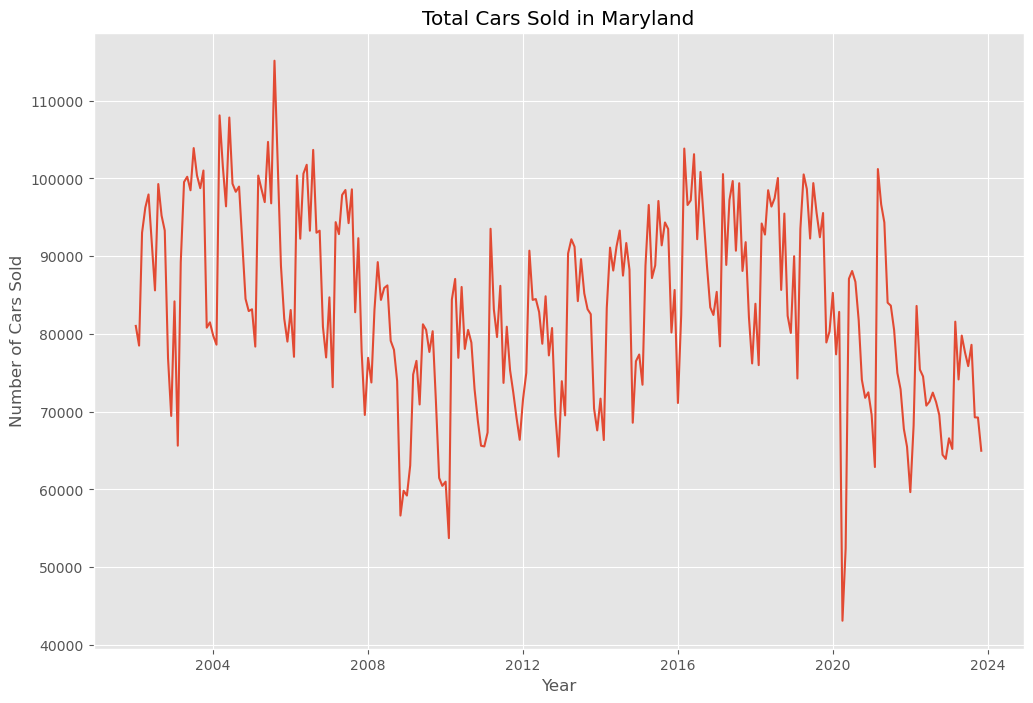

In [192]:
#Look at Chapter 1 for further visualisation
#Looking at Total Cars Sold in Maryland it is clear that there is seasonality, trend, cyclical changes and irregularities
#All 4 of these components need to be explored
line_time_series(monthly_data.index,monthly_data['total_cars_sold'],'Total Cars Sold in Maryland','Year','Number of Cars Sold')

In [193]:
#The first test that is going to take place is the ADF Test
adf_test(monthly_data['total_cars_sold'])

ADF Statistic:  -1.413356213645848
P-Value:  0.5758564972462519
Critical Value: 
	1%: -3.46
	5%: -2.87
	10%: -2.57


Visually it could be assumed that the graph did not display stationarity, this is observed by the linear trend and possible seasonality. Using the ADF test, it further proved that the Total Cars Sold in Maryland data did not represent a stationary dataset. This is going to beneficial to the experiment as it is possible to break down the data into its individual components.



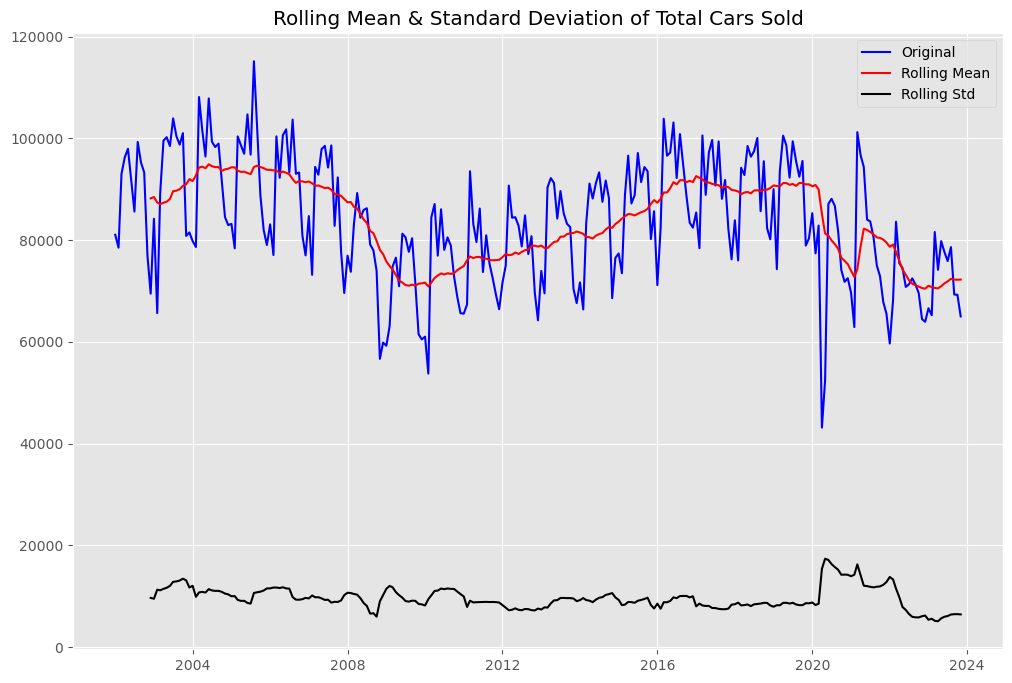

In [194]:
#Take a look at the rolling mean & standard deviation of the total cars sold in Maryland data
#This is going to reflect how the data behaves
roll_mean_std_dev(monthly_data['total_cars_sold'],12, 'Rolling Mean & Standard Deviation of Total Cars Sold')

The standard deviation remains relatively constant across the time span until it gets to 2020 where the standard deviation increases a lot. The smaller the standard deviation, makes it easier to forecast the data. The large oscillations that take place in 2020 are due to the impacts of the Covid-19 pandemic. However, in this chapter, the interest is understanding the seasonality of the data. With this, it is going to make sense to try and remove the irregularity of Covid-19.

The rolling mean suggests that there is some cyclical changes that take place as there are periods of highs and lows while also having seasonality and a linear trend.

### 2. Trend
Capture the trend by putting a line of best fit through the data. When you have a linear line, you can remove these values from the data to normalise it. This results in the true cycle of the data to be found.

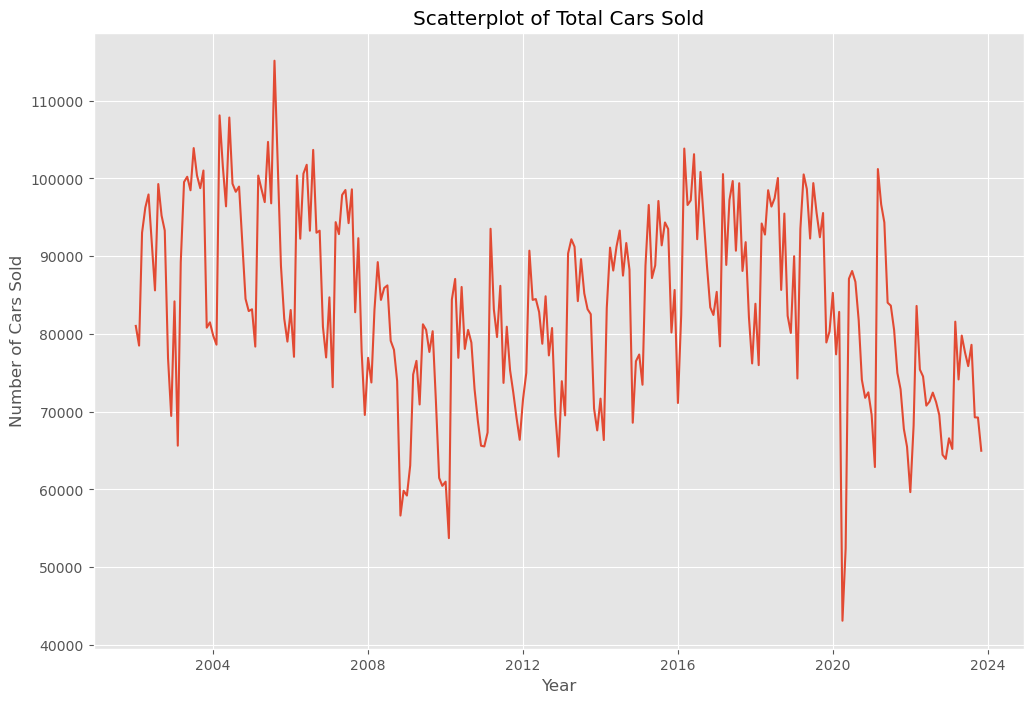

In [195]:
line_time_series(monthly_data.index,monthly_data['total_cars_sold'],'Scatterplot of Total Cars Sold','Year','Number of Cars Sold')

In [196]:
#Create line of best fit
monthly_data_expanded = monthly_data.copy()
monthly_data_expanded.reset_index(inplace=True)
convert_to_incrementing_months(monthly_data_expanded ,'month')
monthly_data_expanded

,month,new_cars_sold,used_cars_sold,values_new_cars_sold,value_used_cars_sold,total_cars_sold,total_value_cars_sold,inflation_rate_cpi,unemployment_rate_not_sa,unemployment_rate_sa,year,incrementing_months
0,1,31106,49927,755015820,386481929,81033,1141497749,2.6,5.5,5.0,2002,1
1,2,27520,50982,664454223,361353242,78502,1025807465,2.6,5.2,5.0,2002,2
2,3,34225,58794,805666244,419385387,93019,1225051631,2.4,5.1,5.0,2002,3
3,4,36452,59817,846368297,433061150,96269,1279429447,2.5,4.9,4.9,2002,4
4,5,37359,60577,855005784,442569410,97936,1297575194,2.5,4.7,4.9,2002,5
...,...,...,...,...,...,...,...,...,...,...,...,...
258,7,26360,49502,1196918451,887723892,75862,2084642343,4.7,1.7,1.8,2023,259
259,8,25876,52725,1222581892,908454060,78601,2131035952,4.3,1.8,1.7,2023,260
260,9,23892,45386,1134437699,744676584,69278,1879114283,4.1,1.8,1.6,2023,261
261,10,23775,45473,1122680147,740582533,69248,1863262680,4.0,2.1,1.7,2023,262


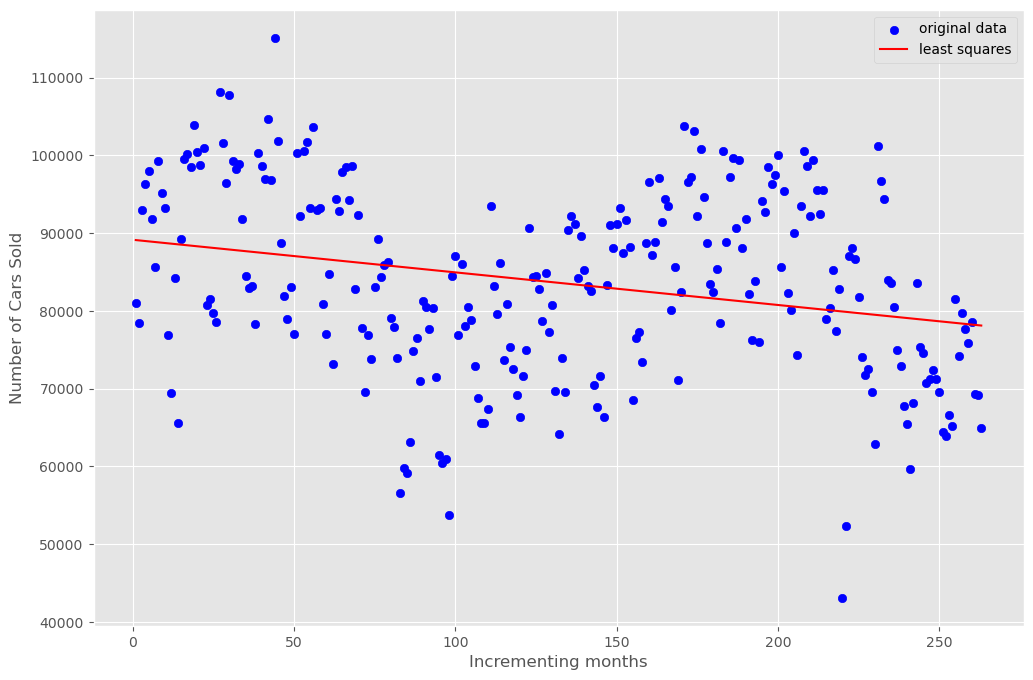

In [255]:
#Plot the least square lines going through all of the data
plot_least_squares_line(monthly_data_expanded,'incrementing_months','total_cars_sold','Incrementing months','Number of Cars Sold')

In [256]:
#In an attempt to better understand the trend, take the yearly rolling average
monthly_data_expanded['yearly_rolling_total_cars_sold'] = monthly_data_expanded['total_cars_sold'].rolling(12).mean()
monthly_data_expanded

,month,new_cars_sold,used_cars_sold,values_new_cars_sold,value_used_cars_sold,total_cars_sold,total_value_cars_sold,inflation_rate_cpi,unemployment_rate_not_sa,unemployment_rate_sa,year,incrementing_months,Predicted_total_cars_sold,yearly_rolling_total_cars_sold
0,1,31106,49927,755015820,386481929,81033,1141497749,2.6,5.5,5.0,2002,1,89113.685966,NaN
1,2,27520,50982,664454223,361353242,78502,1025807465,2.6,5.2,5.0,2002,2,89071.740579,NaN
2,3,34225,58794,805666244,419385387,93019,1225051631,2.4,5.1,5.0,2002,3,89029.795193,NaN
3,4,36452,59817,846368297,433061150,96269,1279429447,2.5,4.9,4.9,2002,4,88987.849806,NaN
4,5,37359,60577,855005784,442569410,97936,1297575194,2.5,4.7,4.9,2002,5,88945.904419,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,7,26360,49502,1196918451,887723892,75862,2084642343,4.7,1.7,1.8,2023,259,78291.776189,71871.000000
259,8,25876,52725,1222581892,908454060,78601,2131035952,4.3,1.8,1.7,2023,260,78249.830802,72383.166667
260,9,23892,45386,1134437699,744676584,69278,1879114283,4.1,1.8,1.6,2023,261,78207.885416,72219.750000
261,10,23775,45473,1122680147,740582533,69248,1863262680,4.0,2.1,1.7,2023,262,78165.940029,72192.083333


In [ ]:
#Remove the trend values from the original data
monthly_data_expanded_decomposed = monthly_data_expanded.copy()
monthly_data_expanded_decomposed['total_cars_sold'] = monthly_data_expanded_decomposed['total_cars_sold'] - 

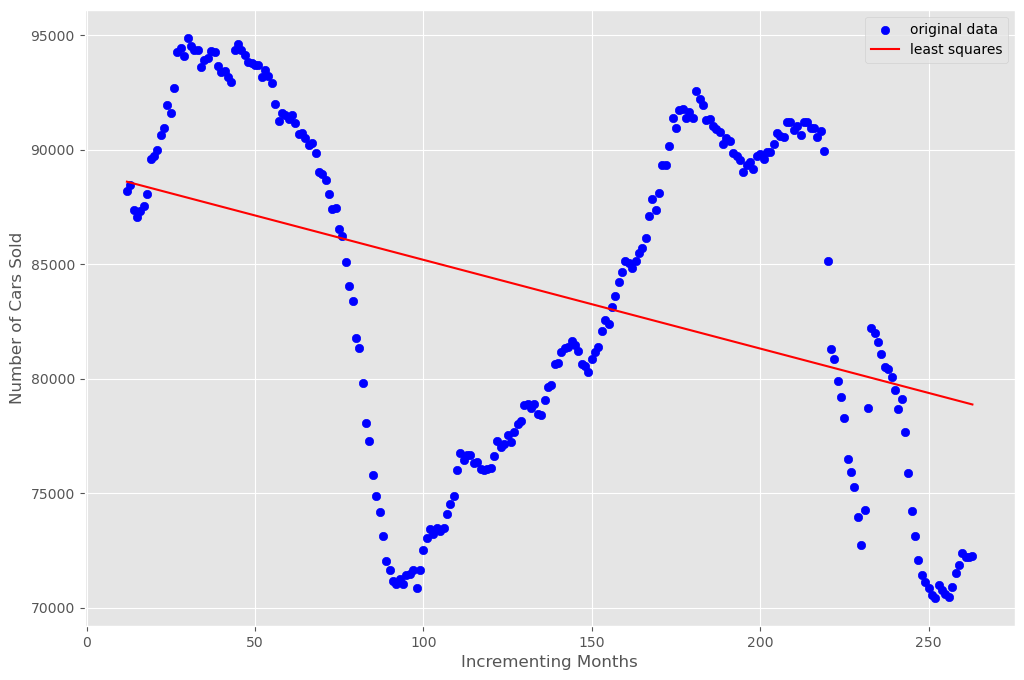

In [258]:
#Plot the graph by dropping the first 11 values
monthly_data_expanded.dropna(inplace=True)
plot_least_squares_line(monthly_data_expanded,'incrementing_months','yearly_rolling_total_cars_sold','Incrementing Months','Number of Cars Sold')

### Capturing Seasonality
The first decomposition is going to be of the seasonality within the graph. First determining the lag that is in between each season and then understanding the average change in values. With this understanding, the projection of cars sold can be done more accurately.

#### ACF and PACF plots
These plots give a good suggestion of whether it is appropriate to assume that there is seasonality in the data.

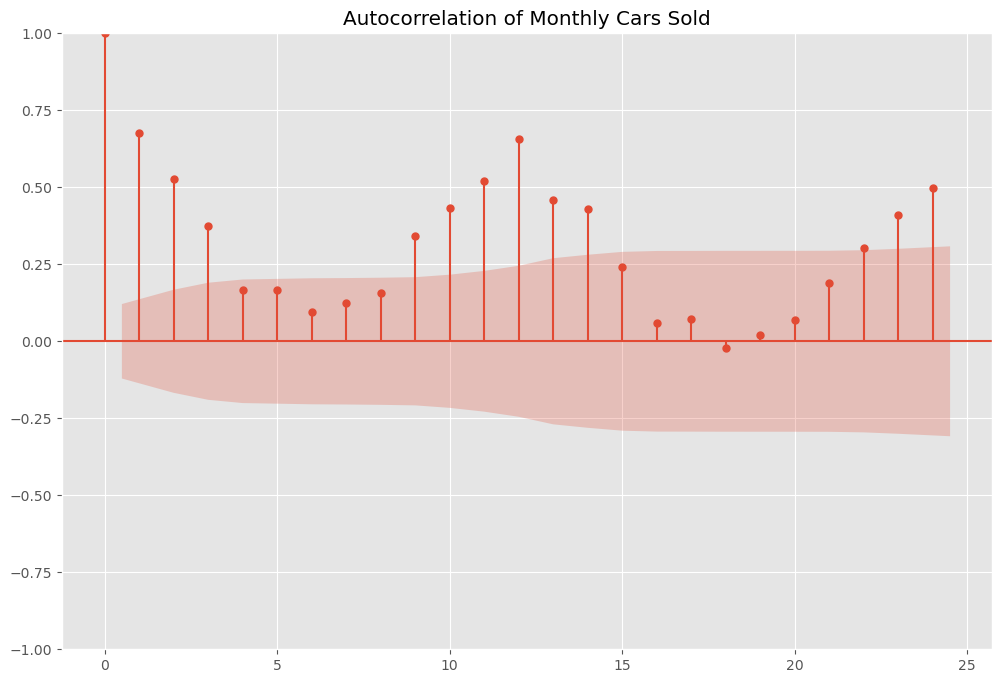

In [198]:
#First have to import the neccessary packages which are specific to finding acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Plot the ACF using a lag of 24 which would suggest if one month was particular related to the result of the same month the next year
plot_acf(monthly_data['total_cars_sold'],lags=24, title='Autocorrelation of Monthly Cars Sold') #lags is representative of the yearly difference
plt.show()

The autocorrelation of total cars sold represents some form of seasonality. There is a peak of autocorrelation 12 lag points after the existing data, this suggests that there is some yearly correlation, which is representative of seasonality. This can be observed again another 12 lag points later at lag 22 where there is a local maximum of correlation, this is enough for there to be enough reason to investigate the seasonality of monthly total cars sold

/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


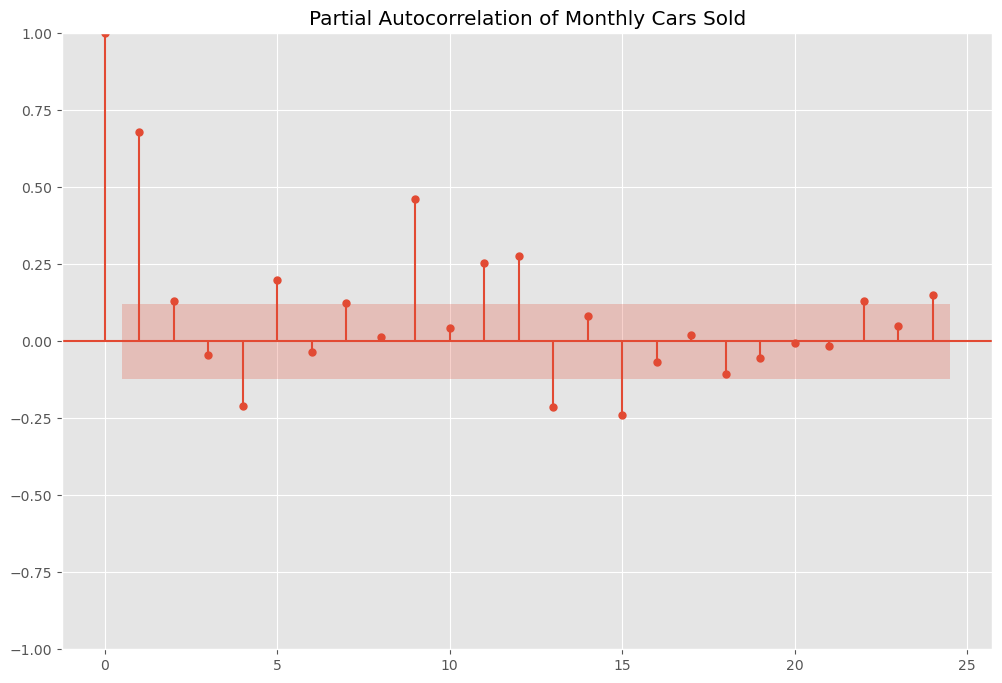

In [199]:
#Continuing from ACF, the technique of PACF is going to be used to help further understand the time series
#The PACF is going to be able to recognise how much position at the lag number is influencial on the current data

plot_pacf(monthly_data['total_cars_sold'],lags=24,title='Partial Autocorrelation of Monthly Cars Sold')
plt.show()

#### Total Cars Sold in Maryland - Partial Autocorrelation (PACF)
There is another local maximum at lag 12. This further suggests that there is a correlation between the data that takes place 11 lags apart which is known as yearly seasonality. This means that there is a high probability that the data that took place from a month in one calendar year has some correlation with the data that takes place in the same month but one calendar year later. This is what is going to be investigated next.

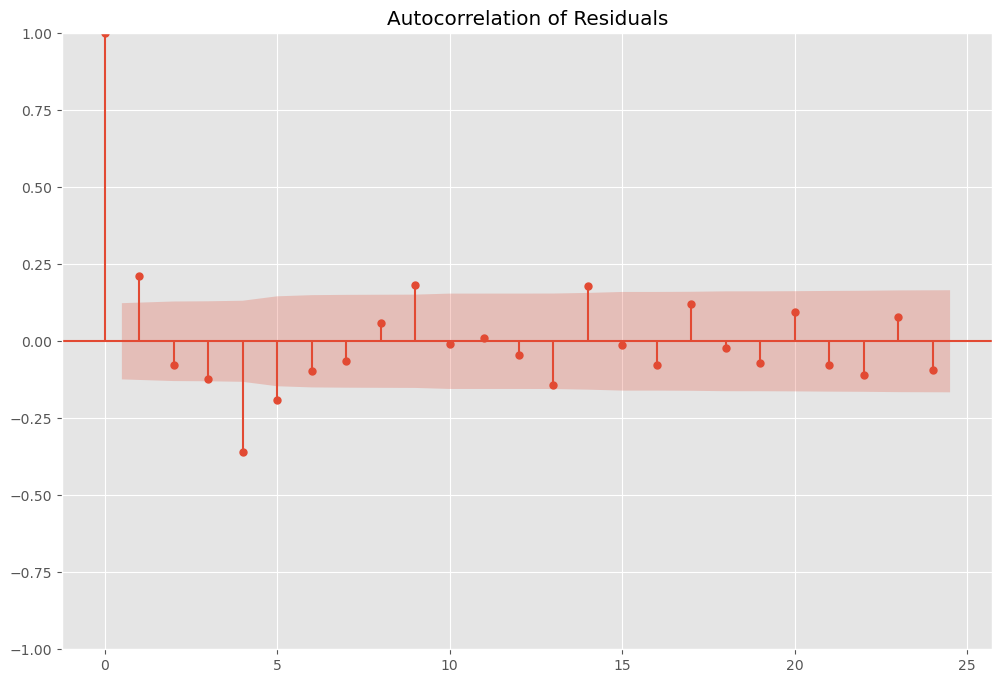

In [200]:
#Create an ACF plot of the residuals to understand if the seasonality component has been successful
#If the ACF does not show any pattern then the data has been decomposed

#Drop the NA values
residual_monthly_cars_sold.dropna(inplace=True)

#Plot the residuals
plot_acf(residual_monthly_cars_sold, title = 'Autocorrelation of Residuals')
plt.show()

The autocorrelation plot of the residuals should reflect small values. If there is a higher value, this might suggest that the model still has a component that has not been decomposed yet.

In [201]:
#Capture the seasonality and do some analysis of it to understand which months have higher or lower selling months
seasonal_monthly_cars_sold = pd.DataFrame(seasonality_monthly_cars_sold)
seasonal_monthly_cars_sold.index = pd.to_datetime(seasonal_monthly_cars_sold.index)

#Create a dataframe of the data where month is a number
#The column seasonal is going to represent the seasonal value
seasonal_monthly_cars_sold = pd.DataFrame({
    'month': seasonal_monthly_cars_sold.index.month,
    'seasonal': seasonal_monthly_cars_sold['seasonal']
})
seasonal_monthly_cars_sold

,month,seasonal
month,,
2002-01-01,1,-8295.295172
2002-02-01,2,-12226.092791
2002-03-01,3,8003.313955
2002-04-01,4,4784.938955
2002-05-01,5,4592.069907
...,...,...
2023-07-01,7,5129.250463
2023-08-01,8,7318.151257
2023-09-01,9,2620.119511


In [202]:
#Create a new dataframe that gets the monthly seasonal value
seasonal_monthly_cars_sold_values = seasonal_monthly_cars_sold.iloc[0:12]
seasonal_monthly_cars_sold_values

,month,seasonal
month,,
2002-01-01,1,-8295.295172
2002-02-01,2,-12226.092791
2002-03-01,3,8003.313955
2002-04-01,4,4784.938955
2002-05-01,5,4592.069907
2002-06-01,6,7646.306415
2002-07-01,7,5129.250463
2002-08-01,8,7318.151257
2002-09-01,9,2620.119511


In [203]:
#Create a list of columns for the dataframe that are more appropriate
columns = {'month': 'month_value', 'seasonal': 'seasonal_value'}

#Drop the index
seasonal_monthly_cars_sold_values.rename(columns=columns, inplace=True)
seasonal_monthly_cars_sold_values.reset_index(inplace=True)
seasonal_monthly_cars_sold_values.drop(columns='month',inplace=True)

#Create a dictionary to map the numbers to months
month_map = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

seasonal_monthly_cars_sold_values['month_name'] = seasonal_monthly_cars_sold_values['month_value'].map(month_map)


seasonal_monthly_cars_sold_values

/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_63393/448511089.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonal_monthly_cars_sold_values.rename(columns=columns, inplace=True)
/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_63393/448511089.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonal_monthly_cars_sold_values.drop(columns='month',inplace=True)
/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_63393/448511089.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,month_value,seasonal_value,month_name
0,1,-8295.295172,January
1,2,-12226.092791,February
2,3,8003.313955,March
3,4,4784.938955,April
4,5,4592.069907,May
5,6,7646.306415,June
6,7,5129.250463,July
7,8,7318.151257,August
8,9,2620.119511,September
9,10,1081.516336,October


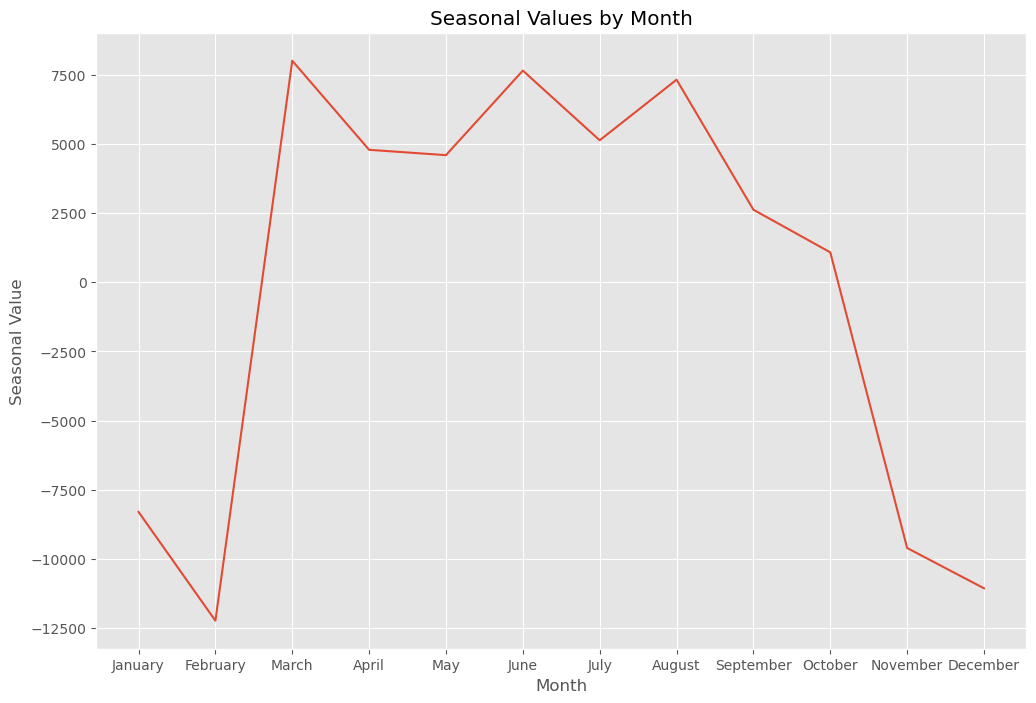

In [204]:
#Plot the seasonal values
line_time_series(seasonal_monthly_cars_sold_values['month_name'],seasonal_monthly_cars_sold_values['seasonal_value'],'Seasonal Values by Month','Month','Seasonal Value')

The graph above indicates the seasonal value that occurs for monthly number of cars sold. From November - February there is are lower sales. Following February there is a massive spike up the sales in March. From March through August there is continued higher sales until the drop in September and October.

In [205]:
#Capture the residual and do some analysis
residual_monthly_cars_sold = pd.DataFrame(residual_monthly_cars_sold)
residual_monthly_cars_sold.index = pd.to_datetime(residual_monthly_cars_sold.index)

#Create a dataframe of the data where month is a number
#The column seasonal is going to represent the seasonal value
residual_monthly_cars_sold = pd.DataFrame({
    'month': residual_monthly_cars_sold.index.month,
    'residual': residual_monthly_cars_sold['resid']
})
residual_monthly_cars_sold

,month,residual
month,,
2002-07-01,7,-7846.458796
2002-08-01,8,4042.390410
2002-09-01,9,5385.005489
2002-10-01,10,5016.775331
2002-11-01,11,-951.724669
...,...,...
2023-01-01,1,3194.545172
2023-02-01,2,5312.009458
2023-03-01,3,1275.227712


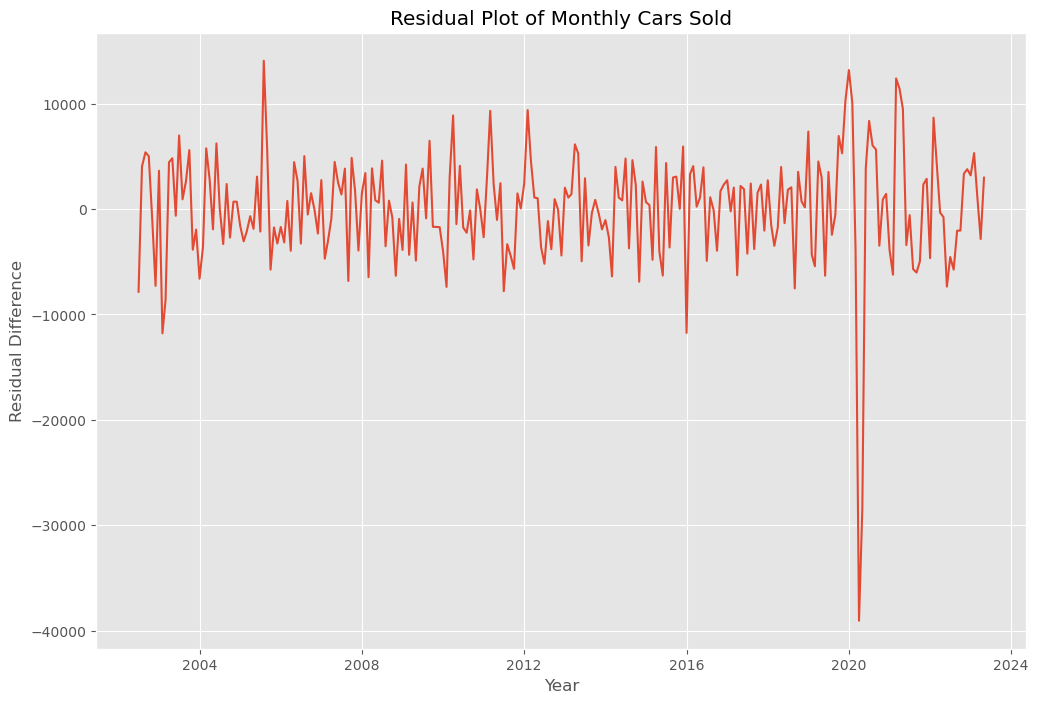

In [206]:
line_time_series(residual_monthly_cars_sold.index,residual_monthly_cars_sold['residual'],'Residual Plot of Monthly Cars Sold','Year','Residual Difference',False)

In [207]:
#Use the ADF test to determine if the residual is stationary
#This will give a confidence interval on the stationarity of the data
#If it is stationary then the time series has been decomposed into its individual parts
adf_test(residual_monthly_cars_sold['residual'])

ADF Statistic:  -6.99264097772398
P-Value:  7.674548958473125e-10
Critical Value: 
	1%: -3.46
	5%: -2.87
	10%: -2.57


The ADF statistic that has been returned is well above the threshold for a 99% confidence interval that the data is stationary. This is a good sign and show allow for effective modeling into the future. However, there is one component of the data that should be removed and that is the irregularity of March 2020, this took place because of the Covid-19 Pandemic. So I am going to remove that point from the data.

In [208]:
#Filter through the data to find those minimum months that are going to be removed from the data
residual_monthly_cars_sold[residual_monthly_cars_sold['residual']<-20000]

,month,residual
month,,
2020-04-01,4,-39060.230622
2020-05-01,5,-28390.153241


The months of April and May in 2020 were post the shock of the Covid-19 Pandemic that was felt to the economy. In later chapters the change in the economy is going to be explored and that change has a strong correlation with the number of cars sold. These two months are going to be removed so that the data represent the overall trend better, taking out irregularities.

In [209]:
#Set the minimum point which is the outlier equal to 0. This is done because the outlier is a one off and does not accurately reflect the accuracy of the residuals.
minimum_residual = residual_monthly_cars_sold['residual'].min()
residual_monthly_cars_sold['residual'] = residual_monthly_cars_sold['residual'].replace(minimum_residual,0)

#Repeat it twice because there are two months that were the outliers
minimum_residual = residual_monthly_cars_sold['residual'].min()
residual_monthly_cars_sold['residual'] = residual_monthly_cars_sold['residual'].replace(minimum_residual,0)

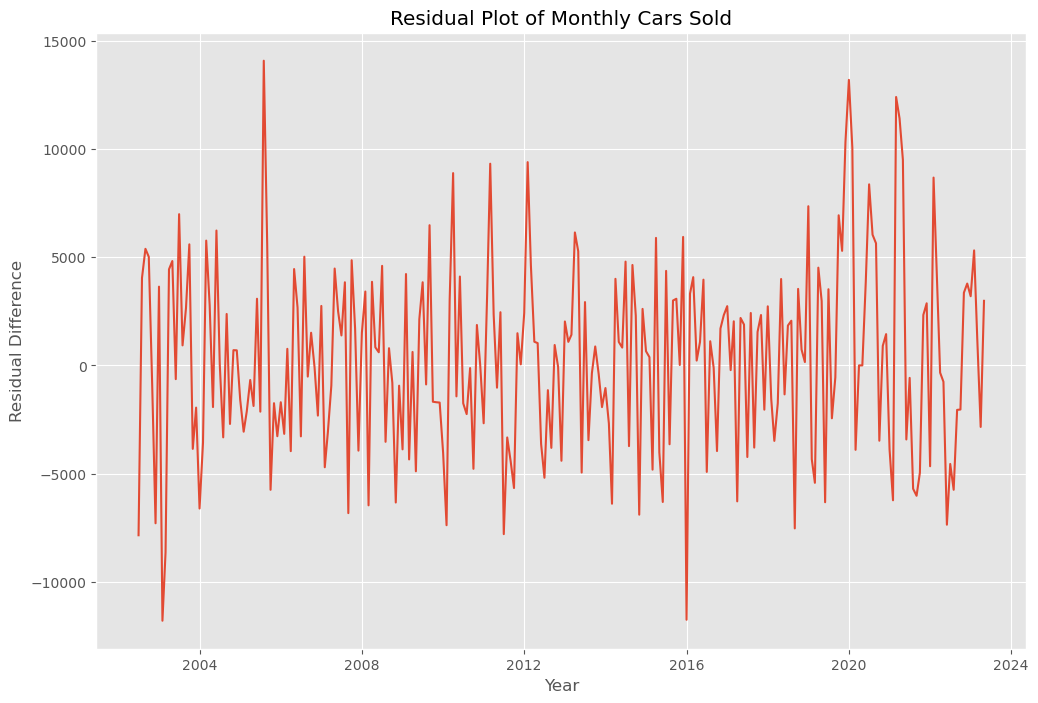

In [210]:
#Time series after the two minimum values have been removed
line_time_series(residual_monthly_cars_sold.index,residual_monthly_cars_sold['residual'],'Residual Plot of Monthly Cars Sold','Year','Residual Difference',False)

In [211]:
#Use the ADF test to determine if the residual is stationary
#This will give a confidence interval on the stationarity of the data
#If it is stationary then the time series has been decomposed into its individual parts
adf_test(residual_monthly_cars_sold['residual'])

ADF Statistic:  -3.1391102872025307
P-Value:  0.02379101082415968
Critical Value: 
	1%: -3.46
	5%: -2.87
	10%: -2.57


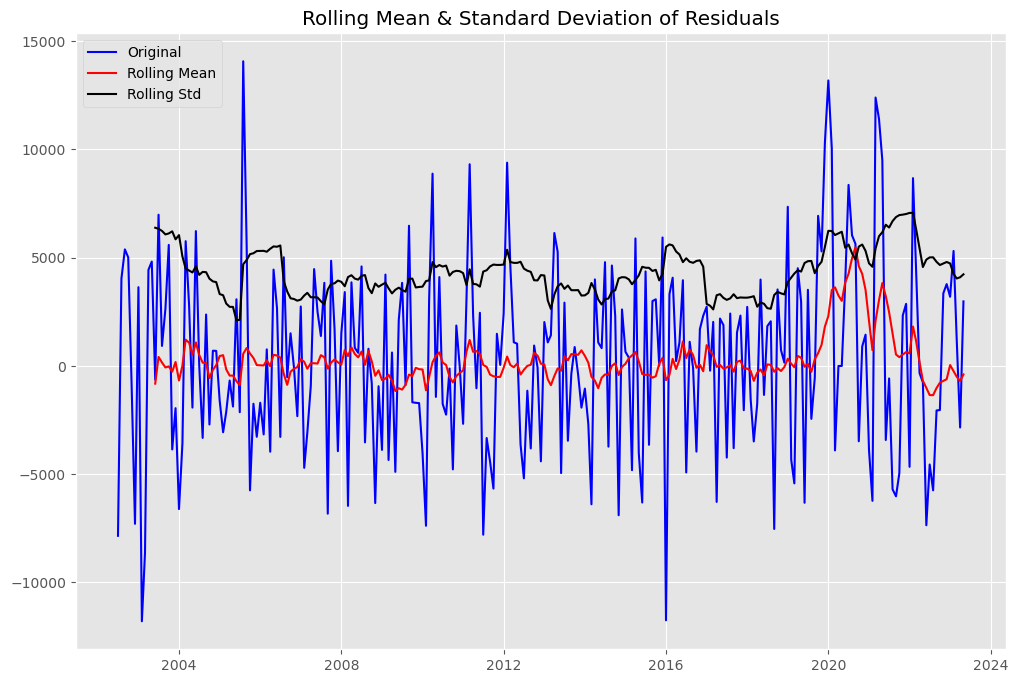

In [212]:
#Take a look at the rolling mean & standard deviation of the total cars sold in Maryland data
#This is going to reflect how the data behaves
roll_mean_std_dev(residual_monthly_cars_sold['residual'],12,'Rolling Mean & Standard Deviation of Residuals')

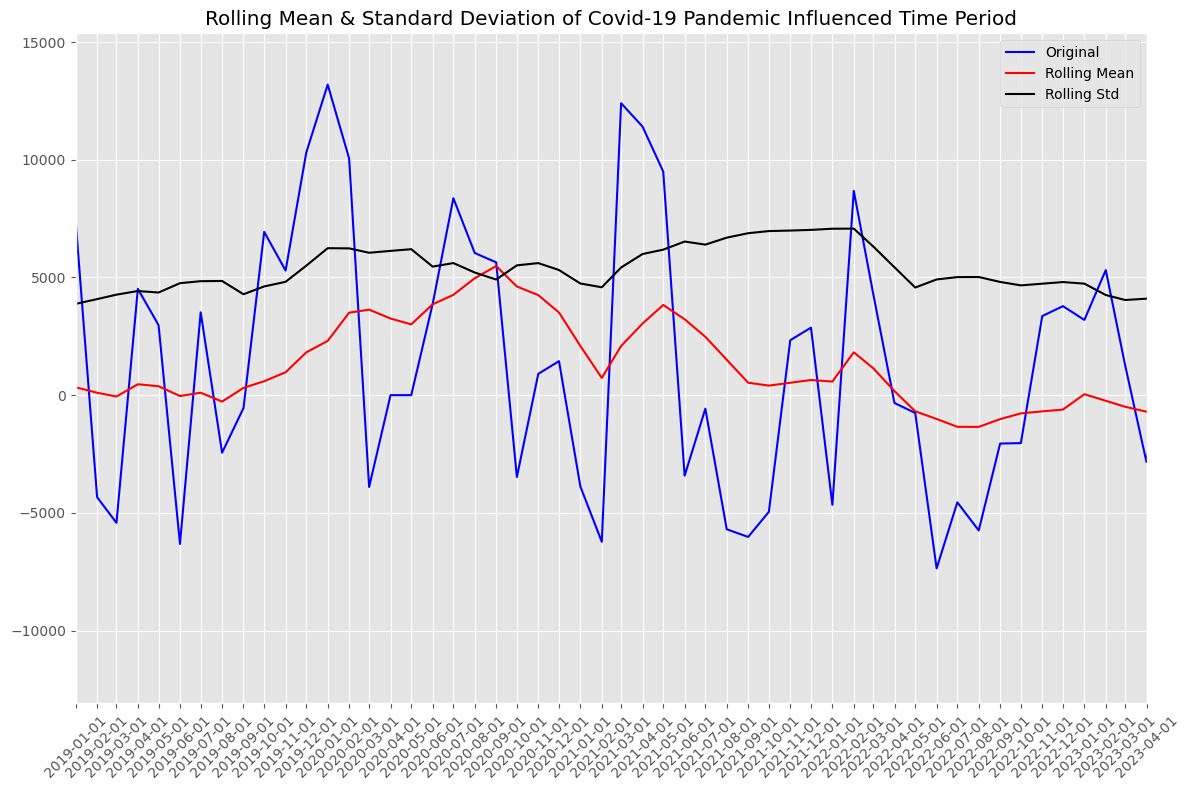

In [213]:
#line_time_series(residual_monthly_cars_sold_covid.index,residual_monthly_cars_sold_covid['resid'],'Residual of Covid-19 Pandemic Influenced Time Period','Year','Residual Value')
residual_monthly_cars_sold.index = pd.to_datetime(residual_monthly_cars_sold.index) 
roll_mean_std_dev_time_period(residual_monthly_cars_sold['residual'],12,'Rolling Mean & Standard Deviation of Covid-19 Pandemic Influenced Time Period','2019-01-01','2023-04-01')

When the irregularities of the outliers have been removed the stationarity of the graph decreases. However, this is due to the increased variability that takes place in the data post the beginning Covid-19 Pandemic. This was a time period where people were getting Covid-19 Relief packages were being sent out to encourage economic activity. This was influencing the disposable income of individuals which would be discussed in more detail in a later chapter. I am going to remove the data from dates 2020-03-01 to 2021-08-01 as these are reflected in the residual as the time periods which went away from the usual variation in the data.

In [214]:
monthly_data_irregularities_removed = pd.DataFrame(monthly_data['total_cars_sold'])
mask = (monthly_data_irregularities_removed.index >= '2020-03-01') & (monthly_data_irregularities_removed.index <= '2021-08-01')
monthly_data_irregularities_removed.loc[mask, :] = pd.NA
monthly_data_irregularities_removed

,total_cars_sold
month,
2002-01-01,81033
2002-02-01,78502
2002-03-01,93019
2002-04-01,96269
2002-05-01,97936
...,...
2023-07-01,75862
2023-08-01,78601
2023-09-01,69278


In [215]:
mask_2 = (monthly_data.index >= '2020-02-01') & (monthly_data.index <= '2021-09-01')
irregular_data_cars_sold = pd.DataFrame(monthly_data['total_cars_sold'][mask_2])
irregular_data_cars_sold

,total_cars_sold
month,
2020-02-01,77376
2020-03-01,82836
2020-04-01,43120
2020-05-01,52407
2020-06-01,87099
2020-07-01,88095
2020-08-01,86700
2020-09-01,81768
2020-10-01,74105


In [216]:
#Plot the graph in two separate section
#The first is the time before the Covid-19 Impact (2020-03-01)
#The second is the time after the Covid-19 Impact (2021-08-01)
timeline_1 = (monthly_data.index>='2002-01-01') & (monthly_data.index<='2020-03-01')
timeline_2 = (monthly_data.index>='2021-09-01') & (monthly_data.index<='2023-10-01')

#Create the dataframes so that the data can be plotted
timeline_1_cars_sold = monthly_data[timeline_1]
timeline_2_cars_sold = monthly_data[timeline_2]

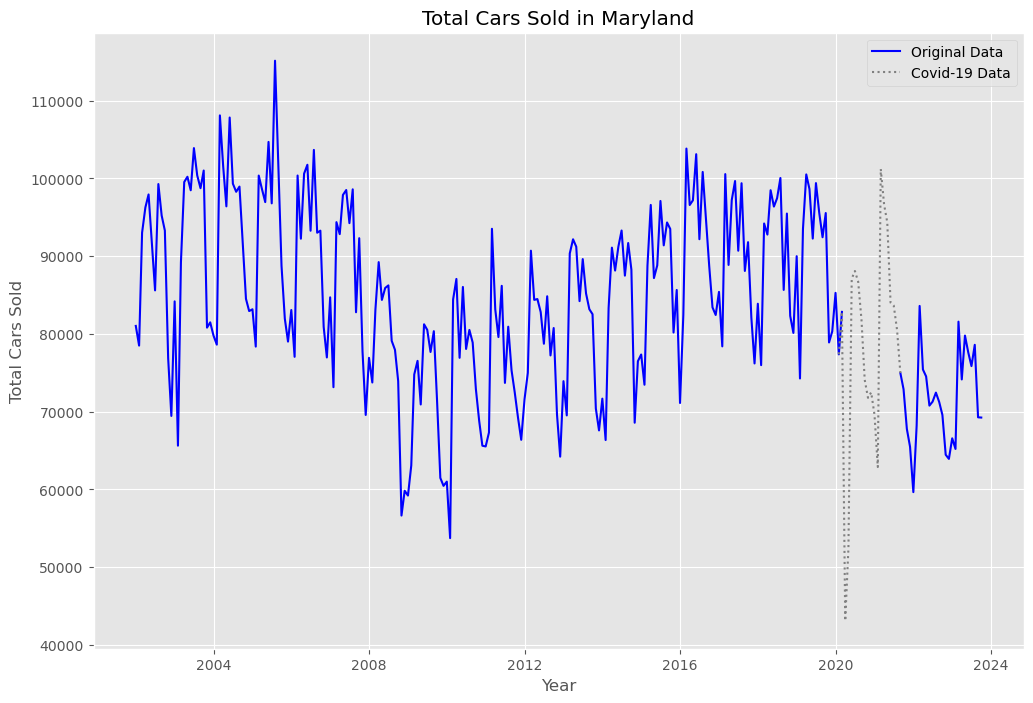

In [217]:
#Plot the graphs of before the missing data, after the missing data
#Also create a dotted line that shows the original data that is irregular
# Plot timeline_1_cars_sold and timeline_2_cars_sold with the same color
plt.plot(timeline_1_cars_sold.index, timeline_1_cars_sold['total_cars_sold'], color='blue', label='Original Data')
plt.plot(timeline_2_cars_sold.index, timeline_2_cars_sold['total_cars_sold'], color='blue')

# Plot irregular_data with a dotted line
plt.plot(irregular_data_cars_sold.index, irregular_data_cars_sold['total_cars_sold'], linestyle='dotted', color='gray', label='Covid-19 Data')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Total Cars Sold')
plt.title('Total Cars Sold in Maryland')
plt.legend()

# Show plot
plt.show()

The graph above shows where the missing data would have existed, in order to overcome this irregularity and effectively forecast future data, the seasonal values that were found before are going to be used. By getting the mean of the years 2020 and 2021, using the seasonal values, the missing values should be appropriately added. 

In [218]:
#Find the mean from each year
yearly_mean = pd.DataFrame(monthly_data['total_cars_sold'].resample('Y').mean())
yearly_mean

,total_cars_sold
month,
2002-12-31,88187.750000
2003-12-31,91967.500000
2004-12-31,94015.416667
2005-12-31,93805.750000
2006-12-31,91354.166667
2007-12-31,88061.083333
2008-12-31,77253.666667
2009-12-31,71484.750000
2010-12-31,74505.583333


In [219]:
irregular_data_cars_sold['Year'] = irregular_data_cars_sold.index.year
irregular_data_cars_sold

,total_cars_sold,Year
month,,
2020-02-01,77376,2020
2020-03-01,82836,2020
2020-04-01,43120,2020
2020-05-01,52407,2020
2020-06-01,87099,2020
2020-07-01,88095,2020
2020-08-01,86700,2020
2020-09-01,81768,2020
2020-10-01,74105,2020


In [220]:
# Replace NaN values for the year 2020
irregular_data_cars_sold.loc[irregular_data_cars_sold['Year'] == 2020, 'mean_total_cars_sold_2020'] = yearly_mean.loc['2020-12-31', 'total_cars_sold']

# Replace NaN values for the year 2021
irregular_data_cars_sold.loc[irregular_data_cars_sold['Year'] == 2021, 'mean_total_cars_sold_2021'] = yearly_mean.loc['2021-12-31', 'total_cars_sold']

irregular_data_cars_sold

,total_cars_sold,Year,mean_total_cars_sold_2020,mean_total_cars_sold_2021
month,,,,
2020-02-01,77376,2020,75255.0,NaN
2020-03-01,82836,2020,75255.0,NaN
2020-04-01,43120,2020,75255.0,NaN
2020-05-01,52407,2020,75255.0,NaN
2020-06-01,87099,2020,75255.0,NaN
2020-07-01,88095,2020,75255.0,NaN
2020-08-01,86700,2020,75255.0,NaN
2020-09-01,81768,2020,75255.0,NaN
2020-10-01,74105,2020,75255.0,NaN


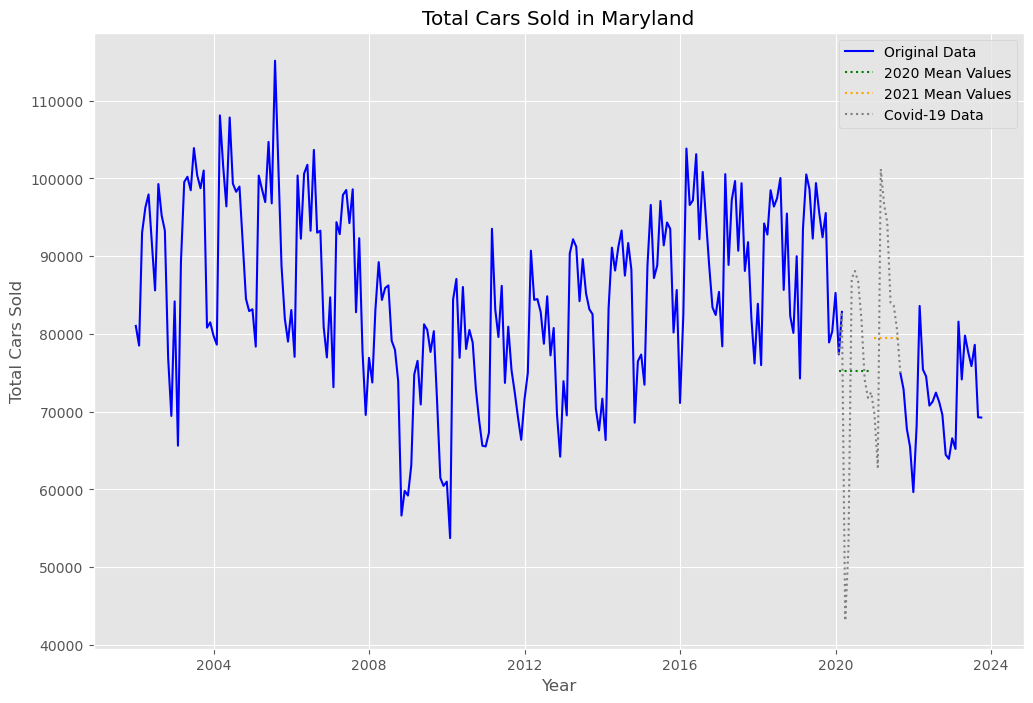

In [221]:
#Plot the mean with the original data and the dotted data
#Plot the graphs of before the missing data, after the missing data
#Also create a dotted line that shows the original data that is irregular
# Plot timeline_1_cars_sold and timeline_2_cars_sold with the same color
plt.plot(timeline_1_cars_sold.index, timeline_1_cars_sold['total_cars_sold'], color='blue', label='Original Data')
plt.plot(timeline_2_cars_sold.index, timeline_2_cars_sold['total_cars_sold'], color='blue')

#Plot the mean of 2020 and 2021 in place of where the data is missing
plt.plot(irregular_data_cars_sold.index,irregular_data_cars_sold['mean_total_cars_sold_2020'],linestyle='dotted',color='green',label='2020 Mean Values')
plt.plot(irregular_data_cars_sold.index,irregular_data_cars_sold['mean_total_cars_sold_2021'],linestyle='dotted',color='orange',label='2021 Mean Values')

# Plot irregular_data with a dotted line
plt.plot(irregular_data_cars_sold.index, irregular_data_cars_sold['total_cars_sold'], linestyle='dotted', color='gray', label='Covid-19 Data')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Total Cars Sold')
plt.title('Total Cars Sold in Maryland')
plt.legend()

# Show plot
plt.show()

In [222]:
irregular_data_cars_sold_0 = irregular_data_cars_sold

In [223]:
irregular_data_cars_sold_0['month_number'] = irregular_data_cars_sold.index.month
irregular_data_cars_sold_0.reset_index(inplace=True)
irregular_data_cars_sold_0

,month,total_cars_sold,Year,mean_total_cars_sold_2020,mean_total_cars_sold_2021,month_number
0,2020-02-01,77376,2020,75255.0,NaN,2
1,2020-03-01,82836,2020,75255.0,NaN,3
2,2020-04-01,43120,2020,75255.0,NaN,4
3,2020-05-01,52407,2020,75255.0,NaN,5
4,2020-06-01,87099,2020,75255.0,NaN,6
5,2020-07-01,88095,2020,75255.0,NaN,7
6,2020-08-01,86700,2020,75255.0,NaN,8
7,2020-09-01,81768,2020,75255.0,NaN,9
8,2020-10-01,74105,2020,75255.0,NaN,10
9,2020-11-01,71785,2020,75255.0,NaN,11


In [224]:
irregular_data_cars_sold_0['mean_total_cars_sold_2020'].fillna(0,inplace=True)
irregular_data_cars_sold_0['mean_total_cars_sold_2021'].fillna(0,inplace=True)

irregular_data_cars_sold_0['mean_total_cars_sold'] = irregular_data_cars_sold['mean_total_cars_sold_2020'] + irregular_data_cars_sold['mean_total_cars_sold_2021']
irregular_data_cars_sold_0.reset_index(inplace=True)

irregular_data_cars_sold_0
irregular_data_cars_sold_0

,index,month,total_cars_sold,Year,mean_total_cars_sold_2020,mean_total_cars_sold_2021,month_number,mean_total_cars_sold
0,0,2020-02-01,77376,2020,75255.0,0.000000,2,75255.000000
1,1,2020-03-01,82836,2020,75255.0,0.000000,3,75255.000000
2,2,2020-04-01,43120,2020,75255.0,0.000000,4,75255.000000
3,3,2020-05-01,52407,2020,75255.0,0.000000,5,75255.000000
4,4,2020-06-01,87099,2020,75255.0,0.000000,6,75255.000000
5,5,2020-07-01,88095,2020,75255.0,0.000000,7,75255.000000
6,6,2020-08-01,86700,2020,75255.0,0.000000,8,75255.000000
7,7,2020-09-01,81768,2020,75255.0,0.000000,9,75255.000000
8,8,2020-10-01,74105,2020,75255.0,0.000000,10,75255.000000
9,9,2020-11-01,71785,2020,75255.0,0.000000,11,75255.000000


In [225]:
# Merge dataframes on 'month_number'
seasonally_adjusted_mean = pd.merge(irregular_data_cars_sold_0[['mean_total_cars_sold', 'month_number','month']],
                     seasonal_monthly_cars_sold_values[['month_value', 'seasonal_value']],
                     left_on='month_number', right_on='month_value', how='left')
irregular_data_cars_sold_0

,index,month,total_cars_sold,Year,mean_total_cars_sold_2020,mean_total_cars_sold_2021,month_number,mean_total_cars_sold
0,0,2020-02-01,77376,2020,75255.0,0.000000,2,75255.000000
1,1,2020-03-01,82836,2020,75255.0,0.000000,3,75255.000000
2,2,2020-04-01,43120,2020,75255.0,0.000000,4,75255.000000
3,3,2020-05-01,52407,2020,75255.0,0.000000,5,75255.000000
4,4,2020-06-01,87099,2020,75255.0,0.000000,6,75255.000000
5,5,2020-07-01,88095,2020,75255.0,0.000000,7,75255.000000
6,6,2020-08-01,86700,2020,75255.0,0.000000,8,75255.000000
7,7,2020-09-01,81768,2020,75255.0,0.000000,9,75255.000000
8,8,2020-10-01,74105,2020,75255.0,0.000000,10,75255.000000
9,9,2020-11-01,71785,2020,75255.0,0.000000,11,75255.000000


In [226]:
irregular_data_cars_sold_na = irregular_data_cars_sold
irregular_data_cars_sold_na.replace(0,pd.NA,inplace=True)
irregular_data_cars_sold_na

,index,month,total_cars_sold,Year,mean_total_cars_sold_2020,mean_total_cars_sold_2021,month_number,mean_total_cars_sold
0,<NA>,2020-02-01,77376,2020,75255.0,<NA>,2,75255.000000
1,1,2020-03-01,82836,2020,75255.0,<NA>,3,75255.000000
2,2,2020-04-01,43120,2020,75255.0,<NA>,4,75255.000000
3,3,2020-05-01,52407,2020,75255.0,<NA>,5,75255.000000
4,4,2020-06-01,87099,2020,75255.0,<NA>,6,75255.000000
5,5,2020-07-01,88095,2020,75255.0,<NA>,7,75255.000000
6,6,2020-08-01,86700,2020,75255.0,<NA>,8,75255.000000
7,7,2020-09-01,81768,2020,75255.0,<NA>,9,75255.000000
8,8,2020-10-01,74105,2020,75255.0,<NA>,10,75255.000000
9,9,2020-11-01,71785,2020,75255.0,<NA>,11,75255.000000


In [227]:
seasonally_adjusted_mean['seasonally_adjusted_mean'] = seasonally_adjusted_mean['mean_total_cars_sold'] + seasonally_adjusted_mean['seasonal_value']
seasonally_adjusted_mean = seasonally_adjusted_mean.iloc[1:]
seasonally_adjusted_mean

,mean_total_cars_sold,month_number,month,month_value,seasonal_value,seasonally_adjusted_mean
1,75255.000000,3,2020-03-01,3,8003.313955,83258.313955
2,75255.000000,4,2020-04-01,4,4784.938955,80039.938955
3,75255.000000,5,2020-05-01,5,4592.069907,79847.069907
4,75255.000000,6,2020-06-01,6,7646.306415,82901.306415
5,75255.000000,7,2020-07-01,7,5129.250463,80384.250463
6,75255.000000,8,2020-08-01,8,7318.151257,82573.151257
7,75255.000000,9,2020-09-01,9,2620.119511,77875.119511
8,75255.000000,10,2020-10-01,10,1081.516336,76336.516336
9,75255.000000,11,2020-11-01,11,-9599.108664,65655.891336
10,75255.000000,12,2020-12-01,12,-11055.170172,64199.829828


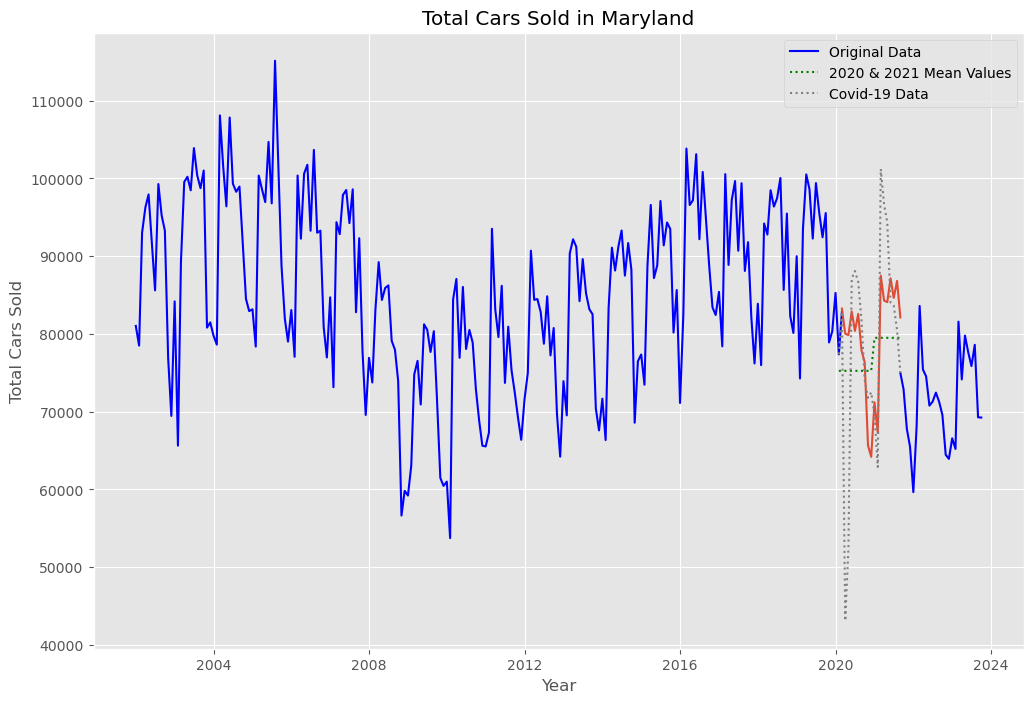

In [228]:
#Plot the mean with the original data and the dotted data
#Plot the graphs of before the missing data, after the missing data
#Also create a dotted line that shows the original data that is irregular
# Plot timeline_1_cars_sold and timeline_2_cars_sold with the same color
plt.plot(timeline_1_cars_sold.index, timeline_1_cars_sold['total_cars_sold'], color='blue', label='Original Data')
plt.plot(timeline_2_cars_sold.index, timeline_2_cars_sold['total_cars_sold'], color='blue')

#Plot the mean of 2020 and 2021 in place of where the data is missing
plt.plot(irregular_data_cars_sold['month'],irregular_data_cars_sold['mean_total_cars_sold'],linestyle='dotted',color='green',label='2020 & 2021 Mean Values')

#Plot the seasonally adjusted mean values on the plot
#Convert month to a datetime
seasonally_adjusted_mean['month'] = pd.to_datetime(seasonally_adjusted_mean['month'])
plt.plot(seasonally_adjusted_mean['month'],seasonally_adjusted_mean['seasonally_adjusted_mean'])


# Plot irregular_data with a dotted line
plt.plot(irregular_data_cars_sold_0['month'], irregular_data_cars_sold_0['total_cars_sold'], linestyle='dotted', color='gray', label='Covid-19 Data')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Total Cars Sold')
plt.title('Total Cars Sold in Maryland')
plt.legend()

# Show plot
plt.show()

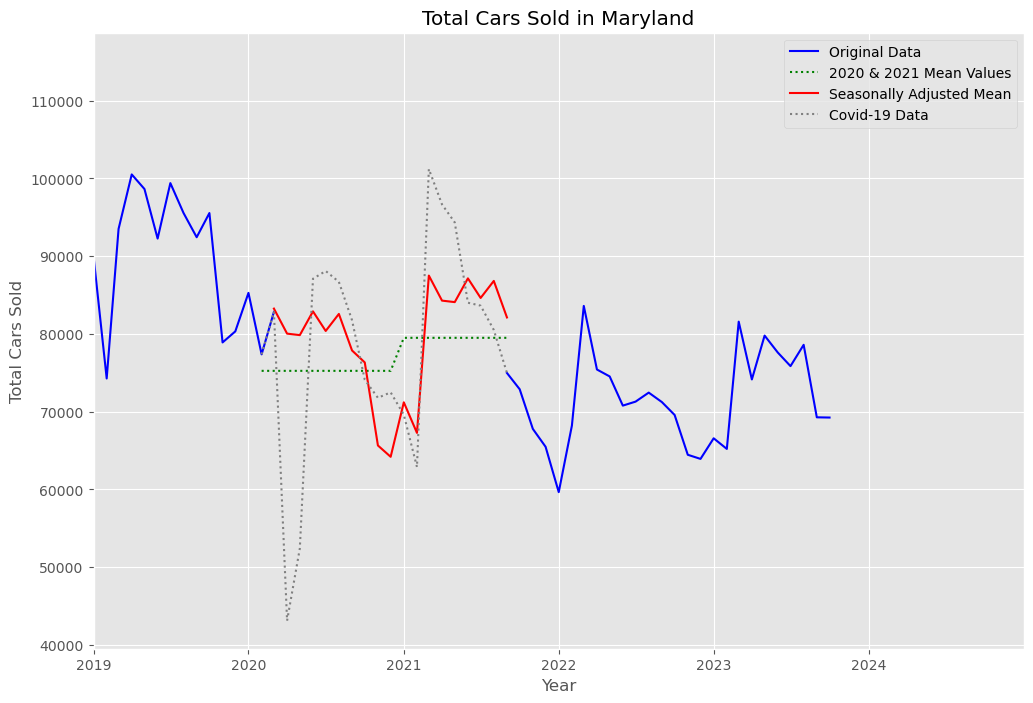

In [229]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already defined your dataframes and variables

# Plot timeline_1_cars_sold and timeline_2_cars_sold with the same color
plt.plot(timeline_1_cars_sold.index, timeline_1_cars_sold['total_cars_sold'], color='blue', label='Original Data')
plt.plot(timeline_2_cars_sold.index, timeline_2_cars_sold['total_cars_sold'], color='blue')

# Plot the mean of 2020 and 2021 in place of where the data is missing
plt.plot(irregular_data_cars_sold['month'], irregular_data_cars_sold['mean_total_cars_sold'], linestyle='dotted', color='green', label='2020 & 2021 Mean Values')

# Plot the seasonally adjusted mean values on the plot
# Convert month to a datetime
seasonally_adjusted_mean['month'] = pd.to_datetime(seasonally_adjusted_mean['month'])
plt.plot(seasonally_adjusted_mean['month'], seasonally_adjusted_mean['seasonally_adjusted_mean'],color = 'red',label = 'Seasonally Adjusted Mean')

# Plot irregular_data with a dotted line
plt.plot(irregular_data_cars_sold_0['month'], irregular_data_cars_sold_0['total_cars_sold'], linestyle='dotted', color='gray', label='Covid-19 Data')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Total Cars Sold')
plt.title('Total Cars Sold in Maryland')
plt.legend()

# Set the x-axis limits to zoom in on the desired range
plt.xlim(pd.Timestamp('2019-01-01'), pd.Timestamp('2024-12-31'))

# Show plot
plt.show()


In [230]:
monthly_data_seasonally_adjusted_cars_sold = monthly_data_irregularities_removed
monthly_data_seasonally_adjusted_cars_sold.reset_index(inplace=True)
monthly_data_seasonally_adjusted_cars_sold

,month,total_cars_sold
0,2002-01-01,81033
1,2002-02-01,78502
2,2002-03-01,93019
3,2002-04-01,96269
4,2002-05-01,97936
...,...,...
258,2023-07-01,75862
259,2023-08-01,78601
260,2023-09-01,69278
261,2023-10-01,69248


In [231]:
seasonally_adjusted_mean_value = seasonally_adjusted_mean.drop(columns=['mean_total_cars_sold', 'month_number', 'month_value', 'seasonal_value'])

In [232]:
seasonally_adjusted_mean_value.rename(columns={'seasonally_adjusted_mean':'total_cars_sold'},inplace=True)
seasonally_adjusted_mean_value = seasonally_adjusted_mean_value[:-1]
seasonally_adjusted_mean_value

,month,total_cars_sold
1,2020-03-01,83258.313955
2,2020-04-01,80039.938955
3,2020-05-01,79847.069907
4,2020-06-01,82901.306415
5,2020-07-01,80384.250463
6,2020-08-01,82573.151257
7,2020-09-01,77875.119511
8,2020-10-01,76336.516336
9,2020-11-01,65655.891336
10,2020-12-01,64199.829828


In [233]:
monthly_data_seasonally_adjusted_cars_sold = pd.merge(monthly_data_seasonally_adjusted_cars_sold, seasonally_adjusted_mean_value, on='month', how='outer')
monthly_data_seasonally_adjusted_cars_sold

,month,total_cars_sold_x,total_cars_sold_y
0,2002-01-01,81033,NaN
1,2002-02-01,78502,NaN
2,2002-03-01,93019,NaN
3,2002-04-01,96269,NaN
4,2002-05-01,97936,NaN
...,...,...,...
258,2023-07-01,75862,NaN
259,2023-08-01,78601,NaN
260,2023-09-01,69278,NaN
261,2023-10-01,69248,NaN


In [234]:
monthly_data_seasonally_adjusted_cars_sold.fillna(0,inplace=True)
monthly_data_seasonally_adjusted_cars_sold['total_cars_sold'] = 0
monthly_data_seasonally_adjusted_cars_sold

,month,total_cars_sold_x,total_cars_sold_y,total_cars_sold
0,2002-01-01,81033,0.0,0
1,2002-02-01,78502,0.0,0
2,2002-03-01,93019,0.0,0
3,2002-04-01,96269,0.0,0
4,2002-05-01,97936,0.0,0
...,...,...,...,...
258,2023-07-01,75862,0.0,0
259,2023-08-01,78601,0.0,0
260,2023-09-01,69278,0.0,0
261,2023-10-01,69248,0.0,0


In [235]:
print(monthly_data_seasonally_adjusted_cars_sold['total_cars_sold_x'].max())
print(monthly_data_seasonally_adjusted_cars_sold['total_cars_sold_y'].max())

115136
87503.98062169313


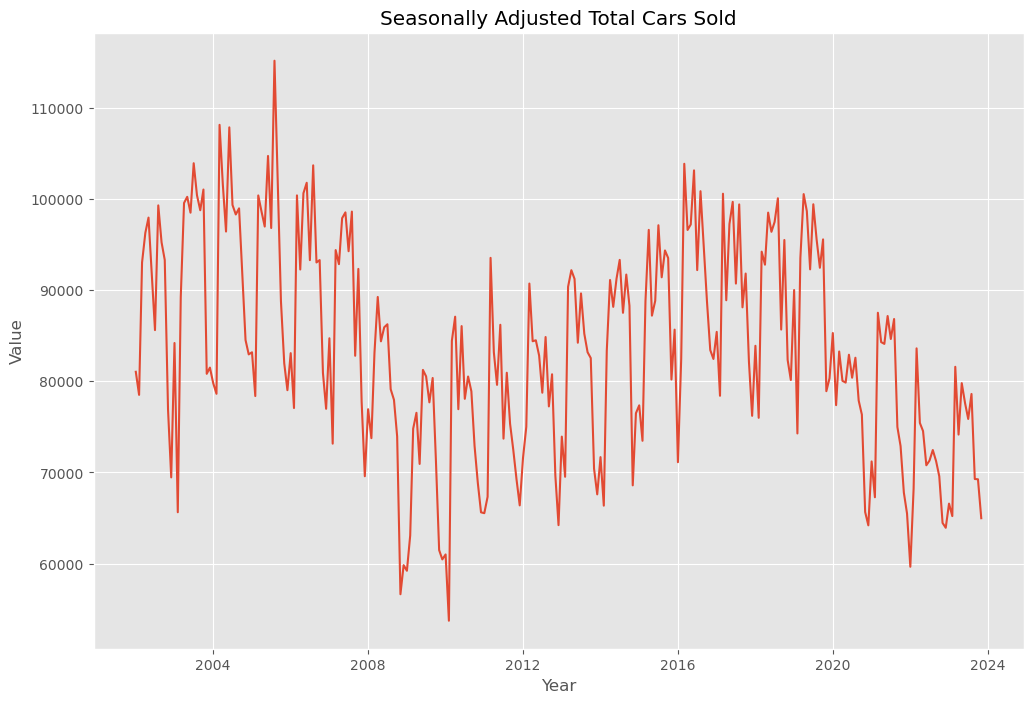

In [236]:
monthly_data_seasonally_adjusted_cars_sold['total_cars_sold'] = monthly_data_seasonally_adjusted_cars_sold['total_cars_sold_x'] + monthly_data_seasonally_adjusted_cars_sold['total_cars_sold_y']
monthly_data_seasonally_adjusted_cars_sold.drop(columns={'total_cars_sold_x','total_cars_sold_y'},inplace=True)
line_time_series(monthly_data_seasonally_adjusted_cars_sold['month'],monthly_data_seasonally_adjusted_cars_sold['total_cars_sold'],'Seasonally Adjusted Total Cars Sold','Year','Value')

In [237]:
monthly_data_seasonally_adjusted_cars_sold.set_index('month',inplace=True)

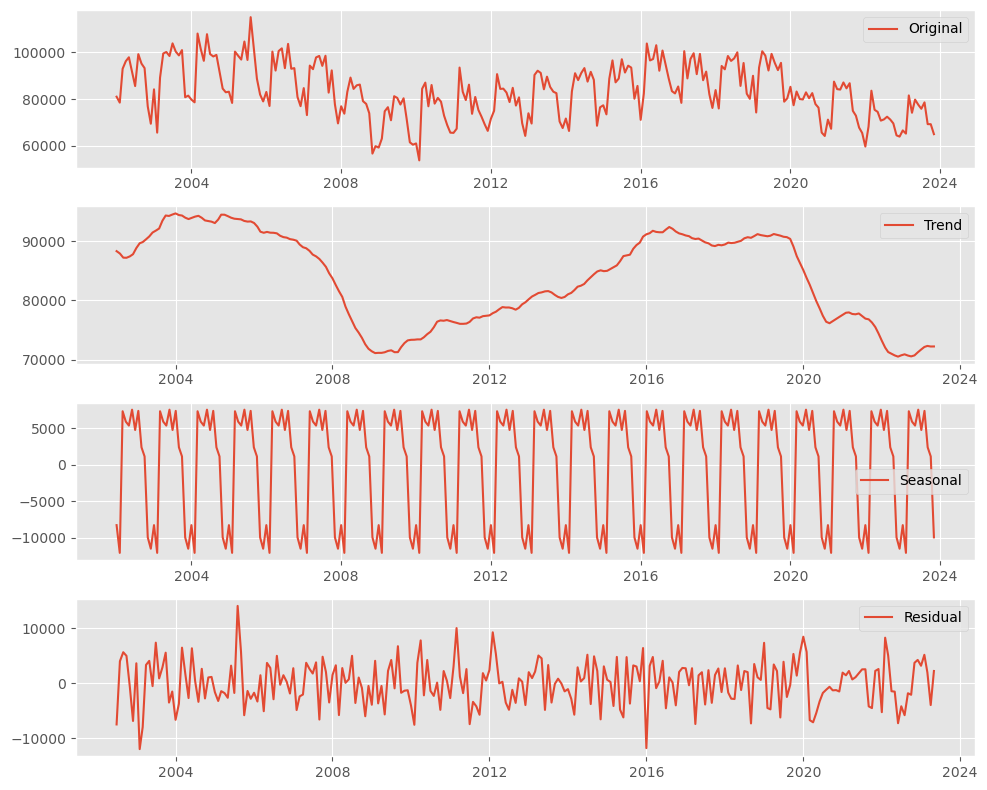

In [238]:
#Use the period that was found in the ACF & PACF so that you can decompose the data
plot_additive_seasonal_decomposition(monthly_data_seasonally_adjusted_cars_sold,12)[0]

In [239]:
residual_seasonally_adjusted_monthly_cars_sold = pd.DataFrame(additive_seasonal_decomposition(monthly_data_seasonally_adjusted_cars_sold,12)[3])
residual_seasonally_adjusted_monthly_cars_sold.dropna(inplace=True)
adf_test(residual_seasonally_adjusted_monthly_cars_sold['resid'])

ADF Statistic:  -6.659817866156836
P-Value:  4.879131152807083e-09
Critical Value: 
	1%: -3.46
	5%: -2.87
	10%: -2.57


In [240]:
residual_monthly_cars_sold_sum_squared = ((residual_monthly_cars_sold['residual'])**2).sum()
residual_seasonally_adjusted_monthly_cars_sold_sum_squared = ((residual_seasonally_adjusted_monthly_cars_sold['resid'])**2).sum()
difference_residuals = ((residual_monthly_cars_sold_sum_squared - residual_seasonally_adjusted_monthly_cars_sold_sum_squared) / residual_monthly_cars_sold_sum_squared)*100

In [241]:
print('Sum of Squared Difference Original Decomposition:' ,residual_monthly_cars_sold_sum_squared)
print('Sum of Squared Difference After Covid-19 Pandemic Time Period Seasonally Adjusted Decomposition:' ,residual_seasonally_adjusted_monthly_cars_sold_sum_squared)
print('Difference Between Residuals as Percentage:',difference_residuals,'%')

Sum of Squared Difference Original Decomposition: 4915611609.056282
Sum of Squared Difference After Covid-19 Pandemic Time Period Seasonally Adjusted Decomposition: 4044643190.4297066
Difference Between Residuals as Percentage: 17.71841406310348 %


There is a 20% increase in accuracy of the forecast after removing the outliers and extreme oscillations that took place from the shock of the Covid-19 Pandemic

There is an additional component of the seasonal decomposition that is not being accounted for. The linear trend shows a somewhat sinusoidal pattern where there are periods of peaks and periods of troughs. To better understand the trend of the data, take a least squares lines going through the 'trend' component of the seasonal decomposition. Once this has been completed take away that trend from the 'trend' seasonal decomposition graph and this should give you the cyclical change. If this can be mapped then that should be able to then create a forecast that takes into account the seasonality of the months, the downward trend in sales, the cyclical changes from economic and socioeconomic situations within society and the irregularities that took place during the Covid-19 shock to the economy.

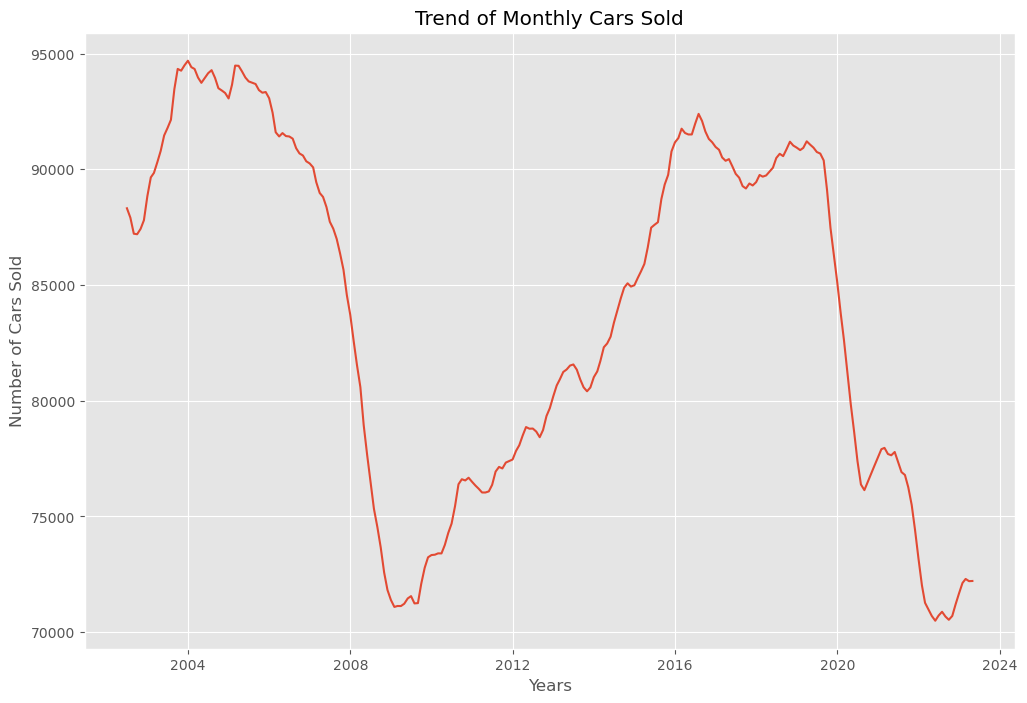

In [242]:
#Plot the monthly cars sold trend
trend_irregularity_removed = pd.DataFrame(additive_seasonal_decomposition(monthly_data_seasonally_adjusted_cars_sold,12)[1])
line_time_series(trend_irregularity_removed.index,trend_irregularity_removed['trend'],'Trend of Monthly Cars Sold','Years','Number of Cars Sold')

In [243]:
# Assuming you already have 'Date' column in your DataFrame

# Convert 'Date' column to datetime
trend_irregularity_removed['Month'] = pd.to_datetime(trend_irregularity_removed.index)

# Calculate offsets in months from the first month in the DataFrame
first_month_index = 0  # Assuming you've defined this earlier
offsets = (trend_irregularity_removed['Month'].dt.year - trend_irregularity_removed['Month'][first_month_index].year) * 12 + (trend_irregularity_removed['Month'].dt.month - trend_irregularity_removed['Month'][first_month_index].month)

# Create a date range based on the first date in the DataFrame
start_date = trend_irregularity_removed['Month'].iloc[0]
trend_irregularity_removed['Month'] = pd.date_range(start=start_date, periods=len(trend_irregularity_removed['Month']), freq='M')

# Add offsets as a new column
trend_irregularity_removed['Month_Offset'] = offsets

trend_irregularity_removed

,trend,Month,Month_Offset
month,,,
2002-01-01,NaN,2002-01-31,0
2002-02-01,NaN,2002-02-28,1
2002-03-01,NaN,2002-03-31,2
2002-04-01,NaN,2002-04-30,3
2002-05-01,NaN,2002-05-31,4
...,...,...,...
2023-07-01,NaN,2023-07-31,258
2023-08-01,NaN,2023-08-31,259
2023-09-01,NaN,2023-09-30,260


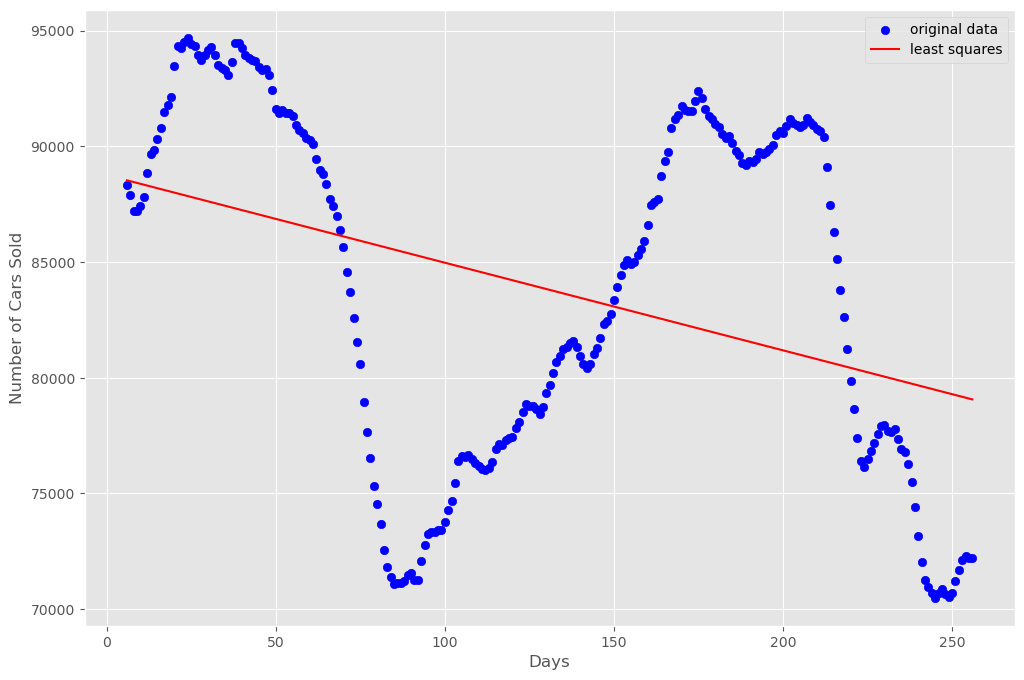

In [244]:
#Create a scatter plot and put a least squares line through the data
from sklearn.linear_model import LinearRegression

# Drop NaN values from the 'trend' column
trend_irregularity_removed.dropna(subset=['trend'], inplace=True)

x_trend_least_squares = trend_irregularity_removed['Month_Offset'].values.reshape(-1, 1).astype(float)
y_trend_least_squares = trend_irregularity_removed['trend'].astype(float)

model = LinearRegression()

model.fit(x_trend_least_squares, y_trend_least_squares)

y_pred = model.predict(x_trend_least_squares)

# Save the predicted values as a new column
trend_irregularity_removed['Predicted_Trend'] = y_pred

plt.scatter(x_trend_least_squares, y_trend_least_squares, label='original data', color='blue')
plt.plot(x_trend_least_squares, y_pred, label='least squares', color='red')

plt.legend()
plt.xlabel('Days')
plt.ylabel('Number of Cars Sold')
plt.show()

Now that you have a least squares line if you take away that least squares lines from the cars sold then that should represent the cyclical changes in the data.

In [245]:
trend_irregularity_removed['Cyclical Data'] = trend_irregularity_removed['trend'] - trend_irregularity_removed['Predicted_Trend']
trend_irregularity_removed

,trend,Month,Month_Offset,Predicted_Trend,Cyclical Data
month,,,,,
2002-07-01,88319.208333,2002-07-31,6,88533.639274,-214.430940
2002-08-01,87914.458333,2002-08-31,7,88495.765914,-581.307580
2002-09-01,87219.875000,2002-09-30,8,88457.892553,-1238.017553
2002-10-01,87197.708333,2002-10-31,9,88420.019193,-1222.310860
2002-11-01,87428.833333,2002-11-30,10,88382.145833,-953.312500
...,...,...,...,...,...
2023-01-01,71680.750000,2023-01-31,252,79216.792661,-7536.042661
2023-02-01,72127.083333,2023-02-28,253,79178.919301,-7051.835967
2023-03-01,72301.458333,2023-03-31,254,79141.045940,-6839.587607


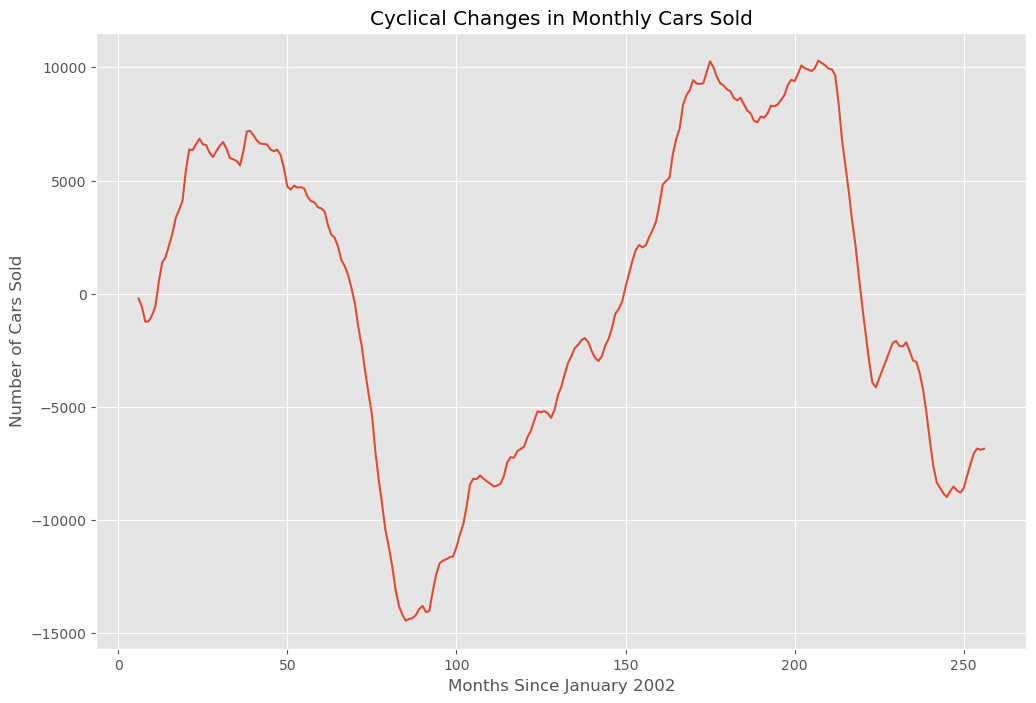

In [246]:
line_time_series(trend_irregularity_removed['Month_Offset'],trend_irregularity_removed['Cyclical Data'],'Cyclical Changes in Monthly Cars Sold','Months Since January 2002','Number of Cars Sold')

In [247]:
trend_irregularity_removed_sin = trend_irregularity_removed.iloc[3:]

period_end = trend_irregularity_removed[(trend_irregularity_removed['Cyclical Data'] >= -4600) &
    (trend_irregularity_removed['Cyclical Data'] <= -4200)]

period_end

,trend,Month,Month_Offset,Predicted_Trend,Cyclical Data
month,,,,,
2008-03-01,81557.333333,2008-03-31,74,85958.250779,-4400.917446
2012-11-01,79341.458333,2012-11-30,130,83837.342607,-4495.884274
2021-11-01,75495.631368,2021-11-30,238,79747.019704,-4251.388335


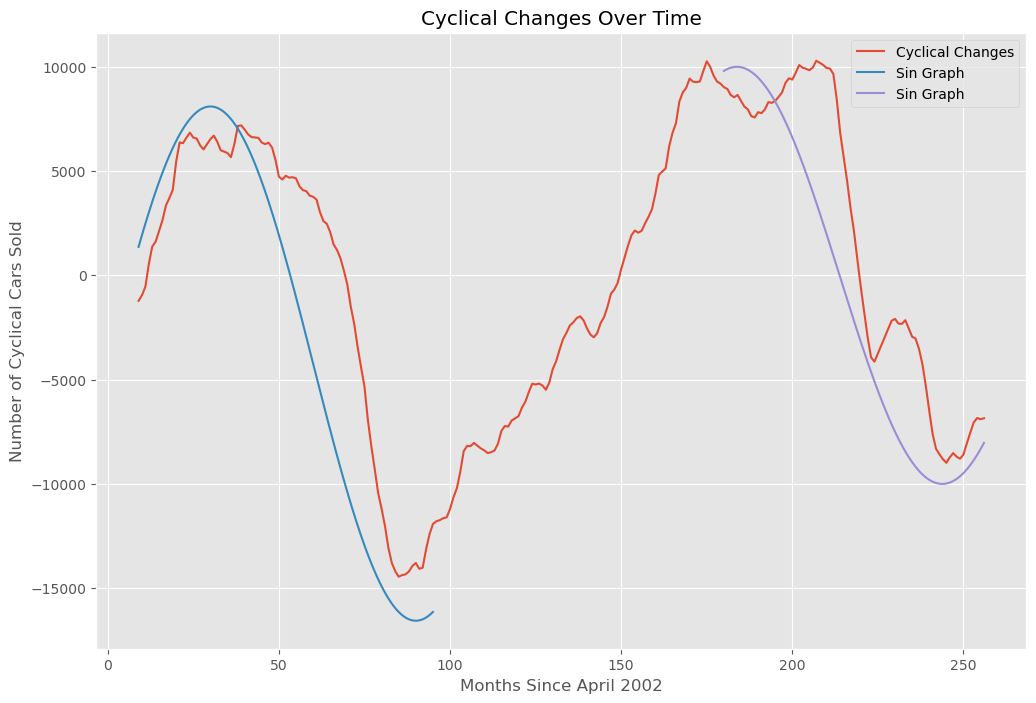

In [248]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'trend_irregularity_removed_sin' is your DataFrame

# Plotting the time series
plt.plot(trend_irregularity_removed_sin['Month_Offset'], trend_irregularity_removed_sin['Cyclical Data'], label='Cyclical Changes')
plt.xlabel('Months Since April 2002')
plt.ylabel('Number of Cyclical Cars Sold')
plt.title('Cyclical Changes Over Time')
plt.legend()

# Generating and plotting the sine wave
x = np.linspace(trend_irregularity_removed_sin['Month_Offset'].min(), 95, 1000)
amplitude = 12329.19
frequency = 1/60
phase = -4230.62
y = amplitude * np.sin(frequency * np.pi * x) + phase
plt.plot(x, y, label='Sin Graph')

# Generating and plotting the sine wave
x = np.linspace(180, trend_irregularity_removed_sin['Month_Offset'].max(), 1000)
amplitude = 10000
frequency = 1/60
phase = 0
y = amplitude * np.sin((frequency * np.pi * x)-140) + phase
plt.plot(x, y, label='Sin Graph')

plt.legend()
plt.show()


In [249]:
trend_irregularity_removed['Cyclical Data'].min()

-14449.143816722513

In [250]:
import numpy as np
from scipy.optimize import leastsq
import pylab as plt

N = 1000 # number of data points
t = np.linspace(0, 4*np.pi, N)
data = 3.0*np.sin(f*t+0.001) + 0.5 + np.random.randn(N) # create artificial data with noise

guess_mean = np.mean(data)
guess_std = 3*np.std(data)/(2**0.5)/(2**0.5)
guess_phase = 0
guess_freq = 1
guess_amp = 1

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean

# Define the function to optimize, in this case, we want to minimize the difference
# between the actual data and our "guessed" parameters
optimize_func = lambda x: x[0]*np.sin(x[1]*t+x[2]) + x[3] - data
est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]

# recreate the fitted curve using the optimized parameters
data_fit = est_amp*np.sin(est_freq*t+est_phase) + est_mean

# recreate the fitted curve using the optimized parameters

fine_t = np.arange(0,max(t),0.1)
data_fit=est_amp*np.sin(est_freq*fine_t+est_phase)+est_mean

plt.plot(t, data, '.')
plt.plot(t, data_first_guess, label='first guess')
plt.plot(fine_t, data_fit, label='after fitting')
plt.legend()
plt.show()

NameError: name 'f' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error

predicted_values = residual_seasonally_adjusted_monthly_cars_sold['resid']
actual_values = monthly_data['total_cars_sold']

# Calculate deviations from the line y=0
deviations_ = [abs(pred - 0) for pred in predicted_values]

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)

ValueError: Found input variables with inconsistent numbers of samples: [262, 250]

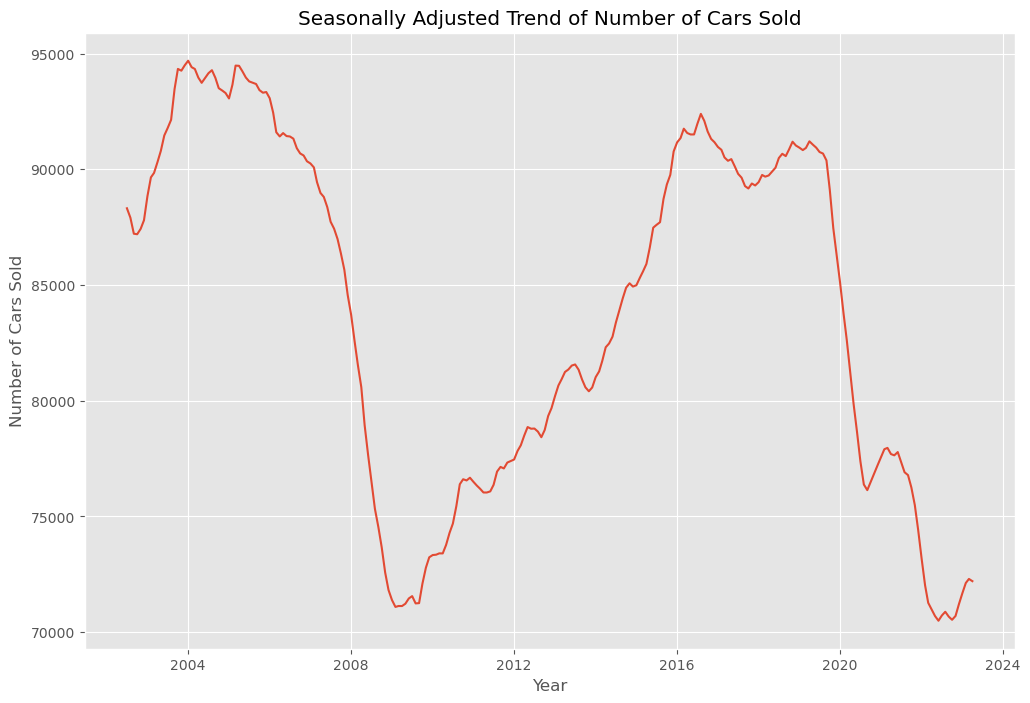

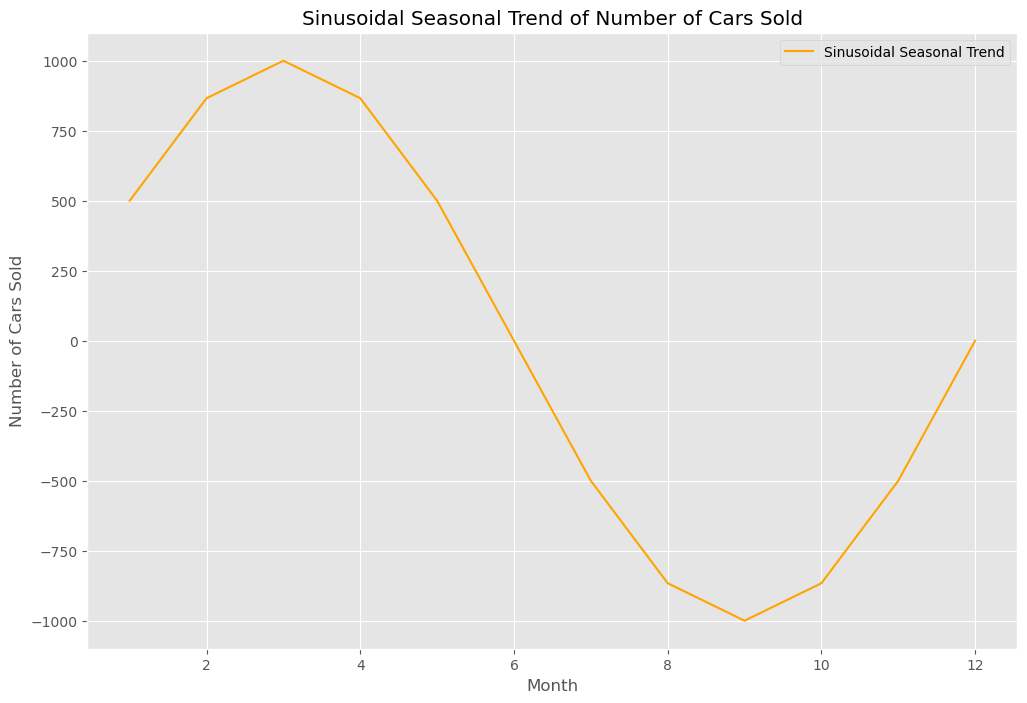

In [ ]:
trend_seasonally_adjusted_monthly_cars_sold = pd.DataFrame(additive_seasonal_decomposition(monthly_data_seasonally_adjusted_cars_sold,12)[1])
line_time_series(trend_seasonally_adjusted_monthly_cars_sold.index,trend_seasonally_adjusted_monthly_cars_sold['trend'],'Seasonally Adjusted Trend of Number of Cars Sold','Year','Number of Cars Sold')

import numpy as np
import matplotlib.pyplot as plt

# Sample properties of the existing seasonal trend
existing_amplitude = 1000  # Example amplitude
existing_frequency = 12  # Example frequency (assuming seasonal period is 12 months)
existing_phase_shift = 0  # Example phase shift

# Generate x values (assuming monthly time intervals)
x_values = np.arange(1, 13)

# Generate sinusoidal y values based on the existing trend properties
sinusoidal_y_values = existing_amplitude * np.sin(2 * np.pi * x_values / existing_frequency + existing_phase_shift)

# Plot the sinusoidal graph
plt.plot(x_values, sinusoidal_y_values, label='Sinusoidal Seasonal Trend', color='orange')
plt.title('Sinusoidal Seasonal Trend of Number of Cars Sold')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
trend_seasonally_adjusted_monthly_cars_sold

There is a chance that the data is going to be doing a recovery due to the economic condition
Next is to start looking at economic data 

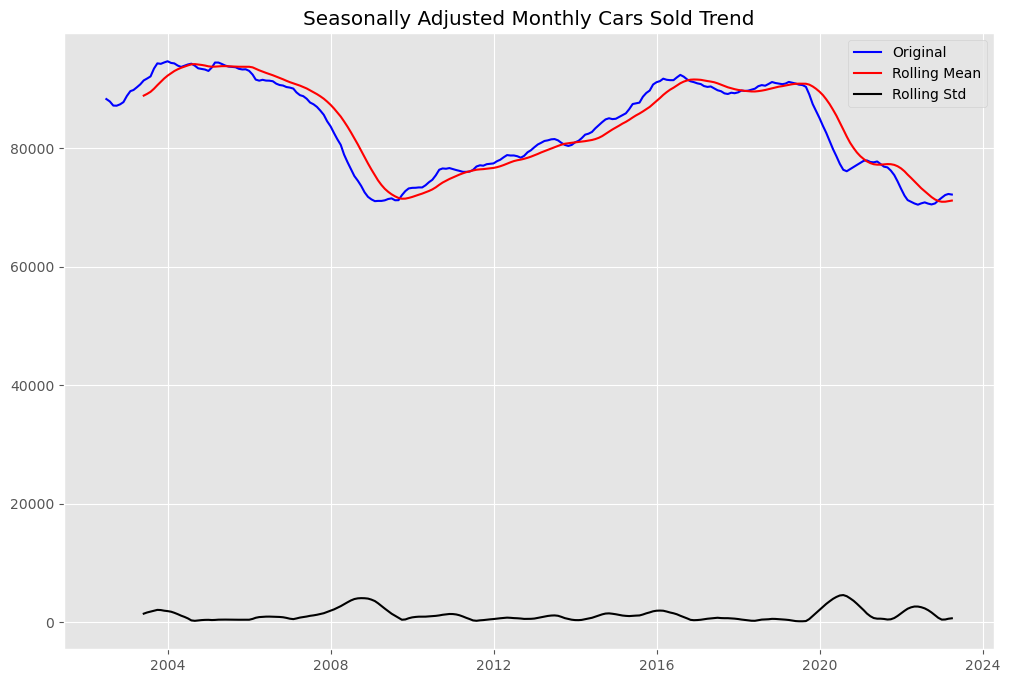

In [ ]:
roll_mean_std_dev(trend_seasonally_adjusted_monthly_cars_sold['trend'],12,'Seasonally Adjusted Monthly Cars Sold Trend')

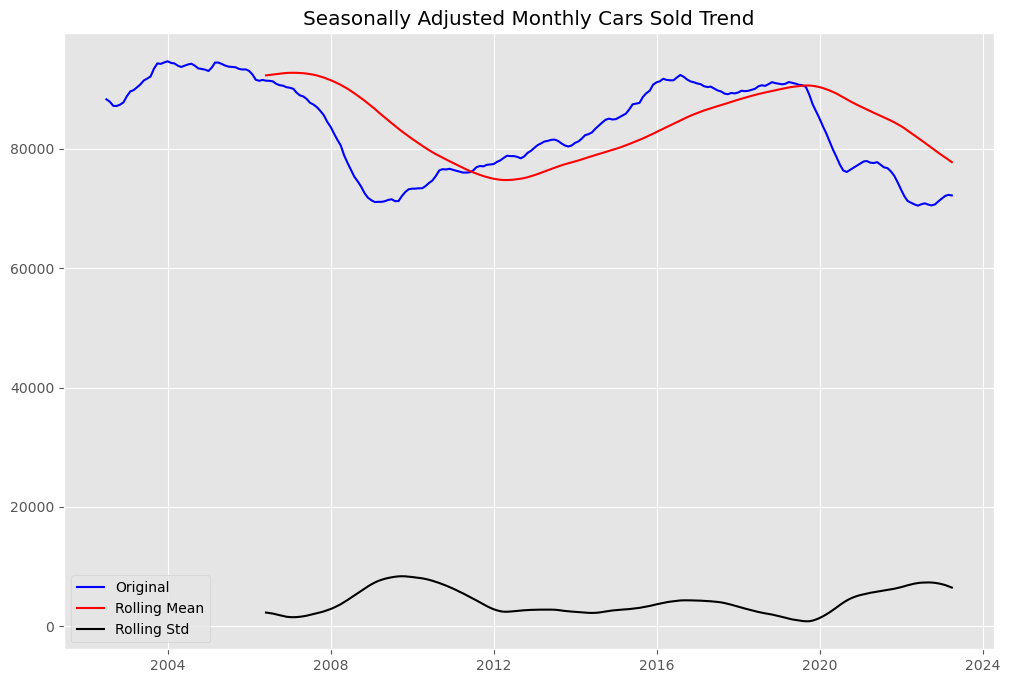

In [ ]:
roll_mean_std_dev(trend_seasonally_adjusted_monthly_cars_sold['trend'],48,'Seasonally Adjusted Monthly Cars Sold Trend')

The goal at this point is to continue to predict the trend considering the seasonality is understood, well this isnt really the trend this is th cyclical nature

Lets look at Holt Winters Seasonally Method and see what the predictions are going to look like for future car sales

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
# Fit simple model and get forecasts
model_simple = SimpleExpSmoothing(monthly_data_seasonally_adjusted_cars_sold['total_cars_sold']).fit(optimized=True)
forecasts_simple = model_simple.forecast(48)

# Fit Holt's model and get forecasts
model_holt = Holt(monthly_data_seasonally_adjusted_cars_sold['total_cars_sold'], damped_trend=True).fit(optimized=True)
forecasts_holt = model_holt.forecast(48)

# Fit Holt Winters model and get forecasts
model_holt_winters = ExponentialSmoothing(monthly_data_seasonally_adjusted_cars_sold['total_cars_sold'], trend='mul',
                                          seasonal='mul', seasonal_periods=12)\
                                          .fit(optimized=True)
forecasts_holt_winters = model_holt_winters.forecast(48)

/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so in

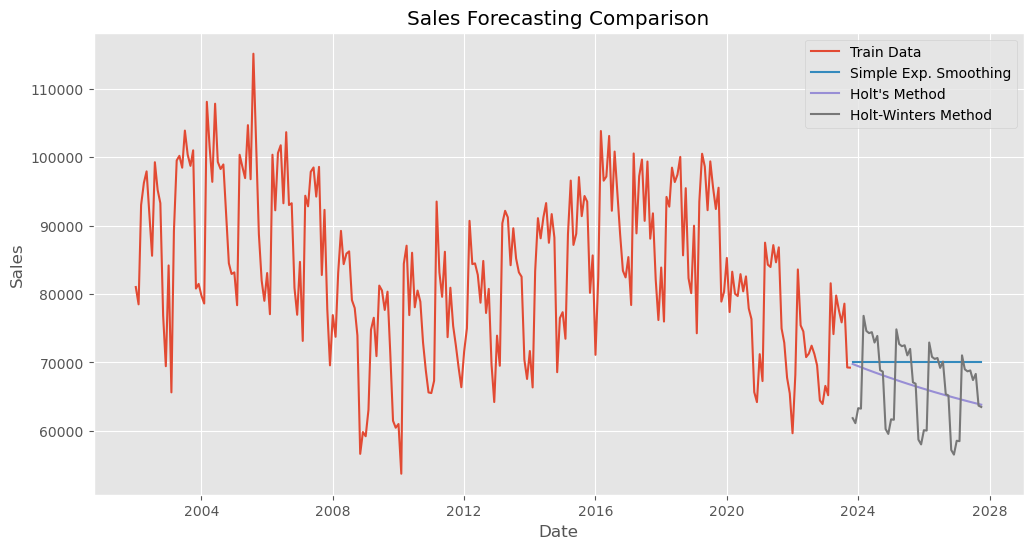

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Plot actual sales data
plt.plot(monthly_data_seasonally_adjusted_cars_sold['total_cars_sold'], label='Train Data')

# Plot forecasts from Simple Exponential Smoothing
plt.plot(forecasts_simple, label='Simple Exp. Smoothing')

# Plot forecasts from Holt's model
plt.plot(forecasts_holt, label="Holt's Method")

# Plot forecasts from Holt-Winters model
plt.plot(forecasts_holt_winters, label="Holt-Winters Method")

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecasting Comparison')
plt.legend()
plt.show()